# <font color = blue>Customer Profiling for a leading fitness equipment Brand
**<font color=green>*Shailendra Pratap Singh - Dec'22 MWF - Batch***

## Business Case

### About Company

The company is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

### Business Problem

The market research team wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

    * Perform descriptive analytics to create a customer profile for each treadmill product by developing appropriate tables and charts.
    * For each treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

### Dataset

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

* Product Purchased:	KP281, KP481, or KP781
* Age:	In years
* Gender:	Male/Female
* Education:	In years
* MaritalStatus:	Single or partnered
* Usage:	The average number of times the customer plans to use the treadmill each week.
* Income:	Annual income (in USD)
* Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
* Miles:	The average number of miles the customer expects to walk/run each week

### Product Portfolio:

    * The KP281 is an entry-level treadmill that sells for USD 1,500.
    * The KP481 is for mid-level runners that sell for USD 1,750.
    * The KP781 treadmill is having advanced features that sell for USD 2,500

## Solutions Content

1. [Problem Defination](#1) <br>
    1.1 [Data Preprocessing](#1.1)<br>
    1.2 [Feature Exploration](1.2)<br>
    1.3 [Modifying the Datatyes](1.3)<br>
    1.4 [Missing Values and Outliers Detection](1.4)<br>
2. [Non-Graphical Analysis](#2) <br>
    2.1 [Unique Values](#2.1) <br>
    2.2 [Value Counts](#2.2)
3. [Visual Analysis](#3) <br>
    3.1 [Univariate Analysis](#3.1) <br>
    3.2 [Bivariate Analysis](#3.2) <br>
    3.3 [Multivariate Analysis](#3.3) <br>
4. [Missing Values and Outliers](#4)
5. [Marginal, Joint, and Conditional Probabilities](#5) <br>
6. [Customer Profiling](#6) <br> 
7. [Business Insights](#7) <br>
8. [Recommendations](#8)

## 1. Problem Defination <a id = "1"></a>

<font size = 3 color = "voilet" type = "Times New Roman"> **_Aerofit, a  fitness equipment manufacturer, want to do customer profiling for each AeroFit treadmill products.AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customer._**

### 1.1 Data Preprocessing <a id= "1.1">

In [1]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

In [2]:
# Importing the Dataset
aerofit = pd.read_csv("aerofit.csv")
aerofit

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


### 1.2 Feature Exploration <a id = "1.2">

In [3]:
## Getting the shape of the data
aerofit.shape

(180, 9)

In [4]:
## Checking the basic informations about all the columns of the dataset
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
## Creating a copy of original dataframe. 
df = aerofit.copy()

In [6]:
## Getting Statstical Summary of the numerical variables
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
## Getting summary of Categorical Variables
df.describe(include=["object", "category"])

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [8]:
## Summary of the dataset
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 180    │ │ int32       │ 6     │                                                          │
│ │ Number of columns │ 9      │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %   ┃ mean     ┃ sd       ┃ p0      ┃ p25     ┃ p75     ┃ p100     ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Age              │    0 │      0 │       29 │      6.9 │      18 │      24 │      33 │       50 │  ▅█▄▃▁▁  │  │
│ │ Education        │    0 │      0 │       16 │      1.6 │      12 │      14 │      16 │       21 │  ▁▅█ ▂   │  │
│ │ Usage            │    0 │      0 │      3.5 │      1.1 │       2 │       3 │       4 │        7 │  ▄█▆▂▁   │  │
│ │ Fitness          │    0 │      0 │      3.3 │     0.96 │       1 │       3 │       4 │        5 │   ▂ █▂▃  │  │
│ │ Income           │    0 │      0 │    54000 │    17000 │   30000 │   44000 │   59000 │   100000 │  ▄█▄▁▁▁  │  │
│ │ Miles            │    0 │      0 │      100 │       52 │      21 │      66 │     110 │      360 │   ▅█▂▁   │  │
│ └──────────────────┴──────┴────────┴──────────┴──────────┴─────────┴─────────┴─────────┴──────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Product                      │      0 │          0 │                           1 │                     180 │  │
│ │ Gender                       │      0 │          0 │                           1 │                     180 │  │
│ │ MaritalStatus                │      0 │          0 │                           1 │                     180 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

<font color = "red">**Observation 1: Initial Exploration of Data**

<font color = "green" type = "Times New Roman" size = 2.75> 

* Data consists of 180 observations of 9 variables.
* Product, Gender, and MaritalStatus columns are stored as objects (Categorical Variables), and the rest are stored as numerical.
* Education, Usage, and Fitness Columns can be converted to categories as they depict the discrete nature of variables.
* There are three unique products (Treadmills) in the dataset. KP281 is the highest-selling product in terms of frequency
* By eye-balling, there is a significant difference in the Mean and Median value (not statistically proven), which shows the presence of outliers.

    * Q1-Q3 and IQR:
    * Age: 24-33 = 9 years
    * Education: 14-16 years
    * Usage: 3-4 times per week
    * Fitness: Level 3-4
    * Income: 44058.75 - 58668.0 = $14,610
    * Miles: 66-114.75 = 48.75 Miles

### 1.3 Modifying the Datatypes <a id = "1.3">

In [9]:
## Converting datatype of "Fitness" and "Usage" column to Category
df[["Fitness", "Usage", "Education"]] = df[["Fitness", "Usage", "Education"]].astype("category")

### 1.4 Missing Values and Outliers detection <a id = "1.4"></a>

In [10]:
## Checking the total count of null values
df.isnull().sum().sum()

0

_We do not have missing values in the dataset_

In [11]:
## Creating another copy to the original dataset
df1 = aerofit.copy()

In [12]:
## Creating a temporary list of numerical columns of original dataset
t_col = df1.describe().columns
t_col

Index(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'], dtype='object')

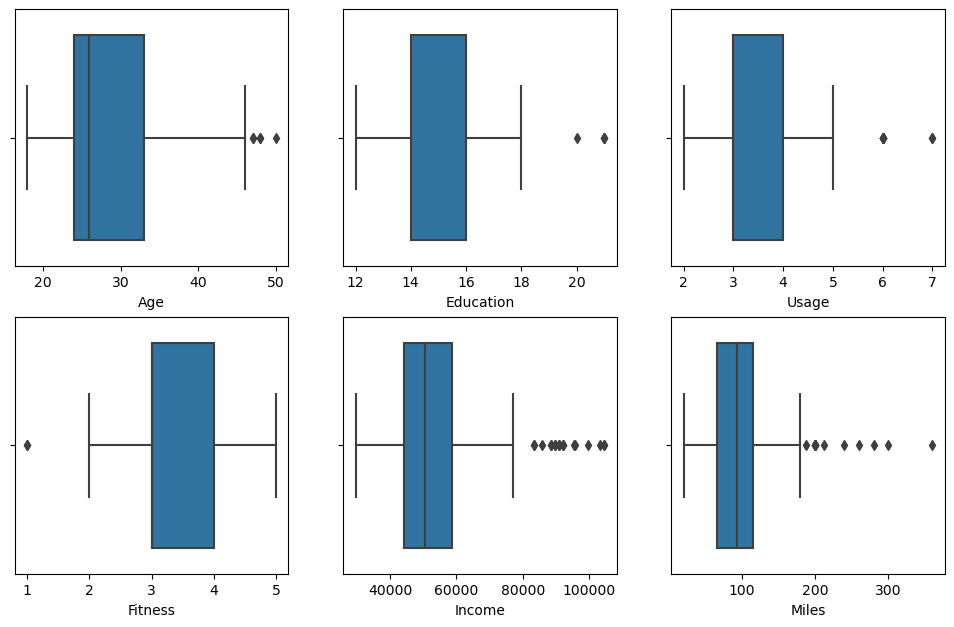

In [13]:
## Plotting Boxplot to identify presence of outliers
fig = plt.figure(figsize = (12,8))
fig.subplots_adjust(top = 1.2)
for i in range(t_col.size):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = df1[t_col[i]])
    plt.xlabel(t_col[i],fontsize = 10)
    plt.xticks(fontsize = 10)

<font color = "red">**Observation 2: Missing Values and Outliers**

<font color = "green" type = "Times New Roman" size = 2.5>
    
* We do not have missing values in the dataset
* There are outliers present in the dataset.
    * The buyers' mean and Median age and income are significantly far away.
    * Buyers expect to walk an average of 103 Miles/week with a Median of 94 Miles/week. The mean and Median are far away
* Boxplot confirms the presence of outliers in the Income and Miles columns.
* Other Variables also have a few outliers.

## 2. Non-Graphical Analysis <a id = "2"></a>

### Unique Values <a id = "2.1">

In [14]:
## Unique values in each feature categories
unq_cnt = pd.DataFrame(columns= ["Variables", "No of Unique Values"])
for i in df.columns:
    unq_cnt.loc[len(unq_cnt.index)] = [i,df[i].nunique()]
unq_cnt

,Variables,No of Unique Values
0,Product,3
1,Age,32
2,Gender,2
3,Education,8
4,MaritalStatus,2
5,Usage,6
6,Fitness,5
7,Income,62
8,Miles,37


### Value Counts <a id = "2.2">

In [15]:
## Identifying numerical columns in the modified dataset
num_col = df.describe().columns
num_col

Index(['Age', 'Income', 'Miles'], dtype='object')

In [16]:
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [17]:
## Identifying Categorical columns in the modified dataset
cat_col = df.describe(include = ("object", "category")).columns
cat_col

Index(['Product', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness'], dtype='object')

In [18]:
# Getting the category wise count and proportion of the categorical variables
for c in cat_col:
    print(pd.DataFrame([df[c].value_counts(),df[c].value_counts(normalize=True).round(2)]), "\n")

Product     KP281  KP481  KP781
count       80.00  60.00  40.00
proportion   0.44   0.33   0.22 

Gender        Male  Female
count       104.00   76.00
proportion    0.58    0.42 

Education      16     14     18    13    15    12    21    20
count       85.00  55.00  23.00  5.00  5.00  3.00  3.00  1.00
proportion   0.47   0.31   0.13  0.03  0.03  0.02  0.02  0.01 

MaritalStatus  Partnered  Single
count             107.00   73.00
proportion          0.59    0.41 

Usage           3      4      2      5     6     7
count       69.00  52.00  33.00  17.00  7.00  2.00
proportion   0.38   0.29   0.18   0.09  0.04  0.01 

Fitness         3      5      2      4     1
count       97.00  31.00  26.00  24.00  2.00
proportion   0.54   0.17   0.14   0.13  0.01 



**Adding Revenue (quantity*unit price) column in the DataFrame**
- Given Unit price
    * KP281 - USD 1,500.
    * KP481 - USD 1,750.
    * KP781 - USD 2,500.

In [19]:
## Adding a column, Revenue
df["Revenue"] = df["Product"].apply(lambda x: 1500 if x == "KP281" else 1750 if x == "KP481" else 2500)

In [20]:
## Getting the product wise revenue and proportions
revenue = df.groupby(["Product"])["Revenue"].sum().reset_index()
revenue["Proportion"] = (revenue["Revenue"]*100/revenue["Revenue"].sum()).round(2)
revenue = revenue.set_index("Product")
revenue

,Revenue,Proportion
Product,,
KP281,120000,36.92
KP481,105000,32.31
KP781,100000,30.77


<font color = "red">**Observation 3: Non Graphical Analysis**

<font color = "green" type = "Times New Roman" size = 2.5>

* **Age** <br>
    * Age of the buyers is between 18 - 50 years (Range: 50-18 = 32 years). <br>
    * 1st Quartile and 3rd Quartiles are 24 years and 33 years resp. (IQR: 33-24 = 9 years)<br>
    * Mean and Median age of the given data is 28.78 and 26 years resp.<br>
    * Above data points show that the majority of buyers are young adults. <br>

* **Income** <br>
    * Income of the buyers are between \\$29,562.0 - \\$104,581.0  (Range = \\$75,019 ). <br> 
    * 1st Quartile and 3rd Quartiles are \\$44,058.75 and \\$58,668.00 resp. (IQR = \\$14,610)<br>
    * Mean and Median Income of the given data is \\$53,719.57 and \\$50,596.5 resp.<br>
    * We have a significantly large range of income levels of the buyers with smaller IQR suggests the majority of the buyers are at mid-income levels (around \\$50K)
    
* **Miles** <br>
    * Miles per week planned are between 21 - 360 Miles (Range = 339 Miles). <br>
    * 1st Quartile and 3rd Quartiles are 66 miles and 114.75 miles resp. (IQR: 33-24 = 9 years)<br>
    * Mean and Median miles per week plan of the given data is 103.2 and 94 miles resp.<br>
    * There is a significantly large distribution of miles planned per week with skewness
    
* **Product:** <br>
    * KP281 is the highest-selling treadmill with an overall 44.44% share in numbers and 36.92% in revenue<br>
    * KP481 contributes 33.33% in numbers and 32.31% in revenue. <br>
    * KP781 contributes 30.77% in numbers and 30.77% in revenue.<br>
    * The above data points show that the contribution of all three products is significant. Thus, products are well planned, designed, priced, positioned and marketed per customer needs.

* **Gender**<br>
    * 58% of the buyers are males.

* **Education**<br>
    * 16 years and 14 years of Education is most common among the buyers. This shows that people with good Education are considering buying health-related products

* **Marital Status**<br>
    * Married people are more interested in buying treadmills than single people

* **Usage**<br>
    * Buyer often plans to use the treadmill 3-4 times a week

* **Fitness**<br>
    * People who consider themselves at fitness levels 3-4, i.e. somewhere in between, are the potential buyers, which also suggests an opportunity to attract/influence people with fitness levels 1-2, who must act on their Fitness.

## 3. Visual Analysis <a id = "3"></a>

### Univatiate Analysis <a id = "3.1">

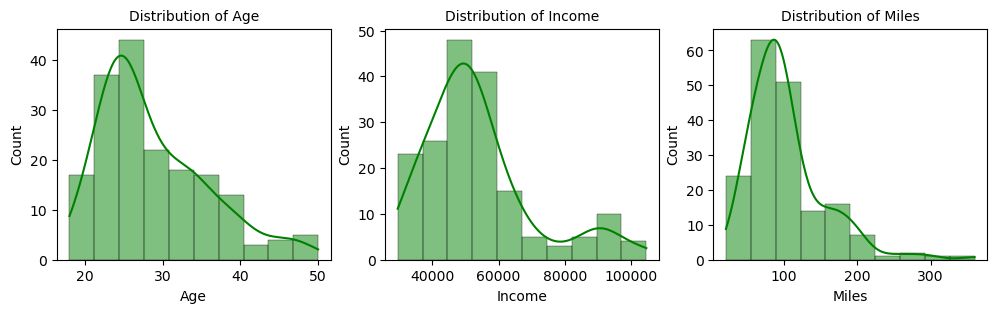

In [21]:
## Plotting Histogram of the numarical variables of the dataset to see the distribution
plt.figure(figsize = (12,3))
for i in range(num_col.shape[0]):
    plt.subplot(1,3,i+1)
    sns.histplot(x = df[num_col[i]], color="green", bins = 10, kde=True, linewidth=0.25);
    plt.title("Distribution of "+ num_col[i], fontsize = 10)
    plt.xlabel(num_col[i],fontsize = 10)
    plt.xticks(fontsize = 10);

**Distribution of Catagorical Variables**

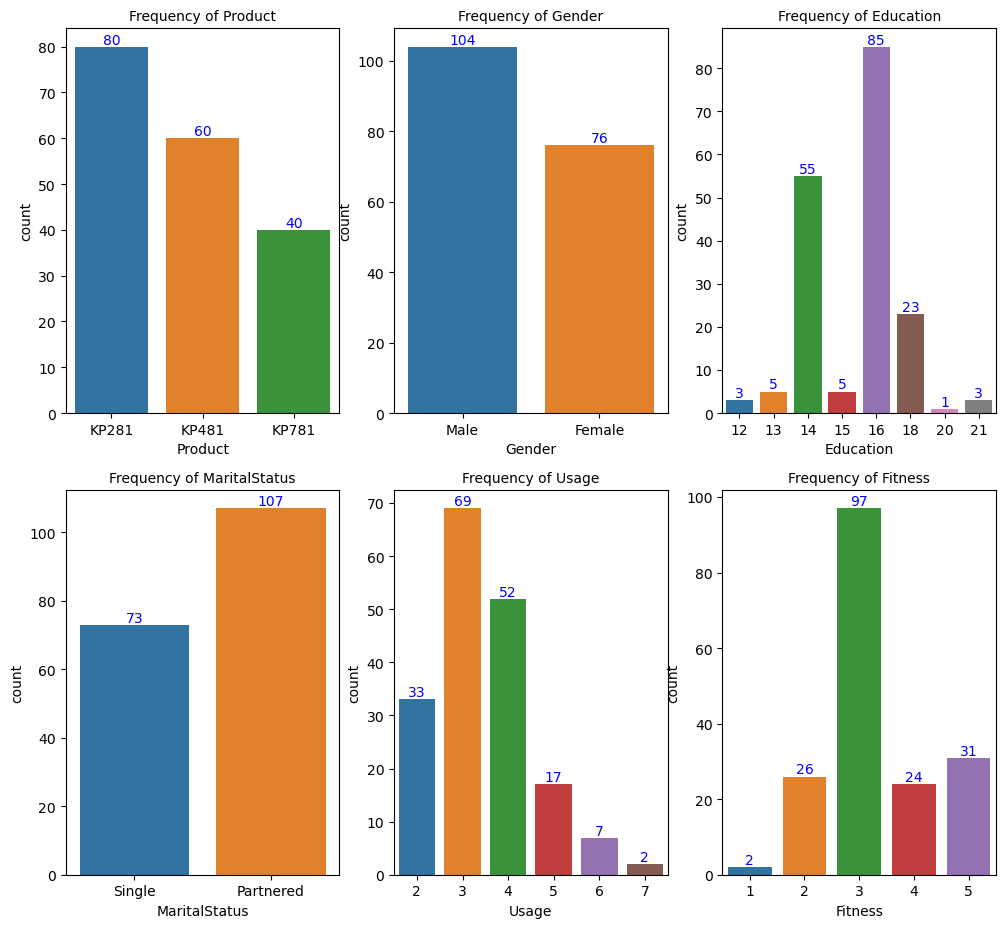

In [22]:
## Plotting Countplot of the Categorical variables of the dataset to see the distribution
fig = plt.figure(figsize = (12,12))
fig.subplots_adjust(top = 1.2)
for i in range(cat_col.size):
    plt.subplot(3,3,i+1)
    ax= sns.countplot(x = df[cat_col[i]]);
    plt.title("Frequency of "+ cat_col[i], fontsize  = 10)
    plt.xlabel(cat_col[i],fontsize = 10)
    plt.xticks(fontsize = 10);
    ax.bar_label(ax.containers[0], color = "blue")

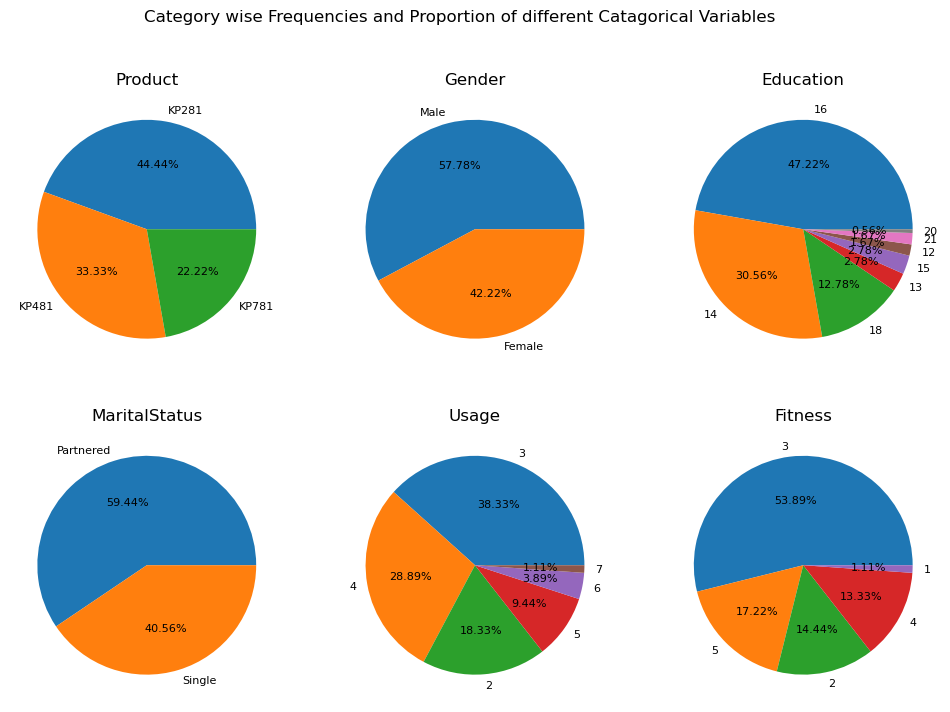

In [23]:
# Plotting the above outcome
plt.figure(figsize = (12,8))
for i in range(len(cat_col)):
    plt.subplot(2,3,i+1)
    ax = df[cat_col[i]].value_counts(normalize = True).plot(kind = "pie", title = cat_col[i], 
                                                            ylabel = "", autopct="%.2f%%", fontsize = 8);   
plt.suptitle("Category wise Frequencies and Proportion of different Catagorical Variables");

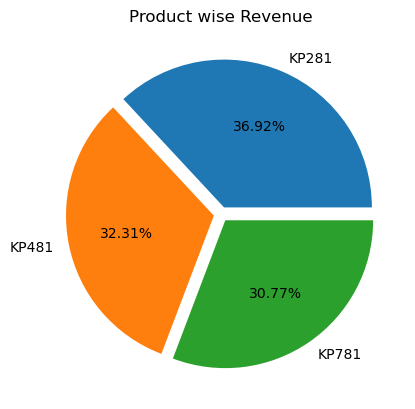

In [24]:
revenue["Revenue"].plot(kind = "pie", explode = (0.05,0.05, 0.05), autopct="%.2f%%", 
             fontsize = 10, title = "Product wise Revenue", ylabel = "");

<font color = "red">**Observations 4 - Univariate Analysis**

<font color = "green" type = "Times New Roman" size = 2.5>
    
* **Age**
    - The distribution of Age is right-skewed. <br>
    * Major chunk of buyers are young adults.

* **Income**
    * The distribution of Income is also right-skewed. <br>
    * Major chunk of buyers are from the mid-income level. <br> 
    * Apart from the major peak, we have another small peak at a higher income level.

* **Miles**
    * The distribution of Miles is also right-skewed. <br>
    * Major buyers planned to walk/run around 100 miles per week.

* **Product:** 
    * KP281 is the highest-selling Treadmill with an overall 44.44\% share in numbers and 36.92\% in revenue. <br>
    * KP481 contributes 33.33\% in numbers and 32.31\% in revenue. <br>
    * KP781 contributes 22.22\% in numbers and 30.77\% in revenue. <br>
    * The above data points show that the contribution of all three products is significant; thus, products are well planned, designed, priced, positioned and marketed as per the customer needs.
    
* **Gender**
    * 58% of the buyers are males.<br>
    
* **Education**
    * 16 years and 14 years of Education is most common among the buyers. This shows that people with good Education are considering buying health-related products

* **Marital Status**
    * Married people (~60%) are more interested in buying treadmills than single people

* **Usage**
    * Buyer majorly planned to use the Treadmill 2-4 times a week

* **Fitness**
    * People who consider themselves at fitness levels 3-4, i.e. somewhere in between, are the potential buyers, which also suggests an opportunity to attract/influence people with fitness levels 1-2, who must act on their Fitness.

### Bivariate Analysis <a id = "3.2">

In [25]:
df2 = df.copy()

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    object  
 3   Education      180 non-null    category
 4   MaritalStatus  180 non-null    object  
 5   Usage          180 non-null    category
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
 9   Revenue        180 non-null    int64   
dtypes: category(3), int64(4), object(3)
memory usage: 11.3+ KB


In [27]:
cat_col

Index(['Product', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness'], dtype='object')

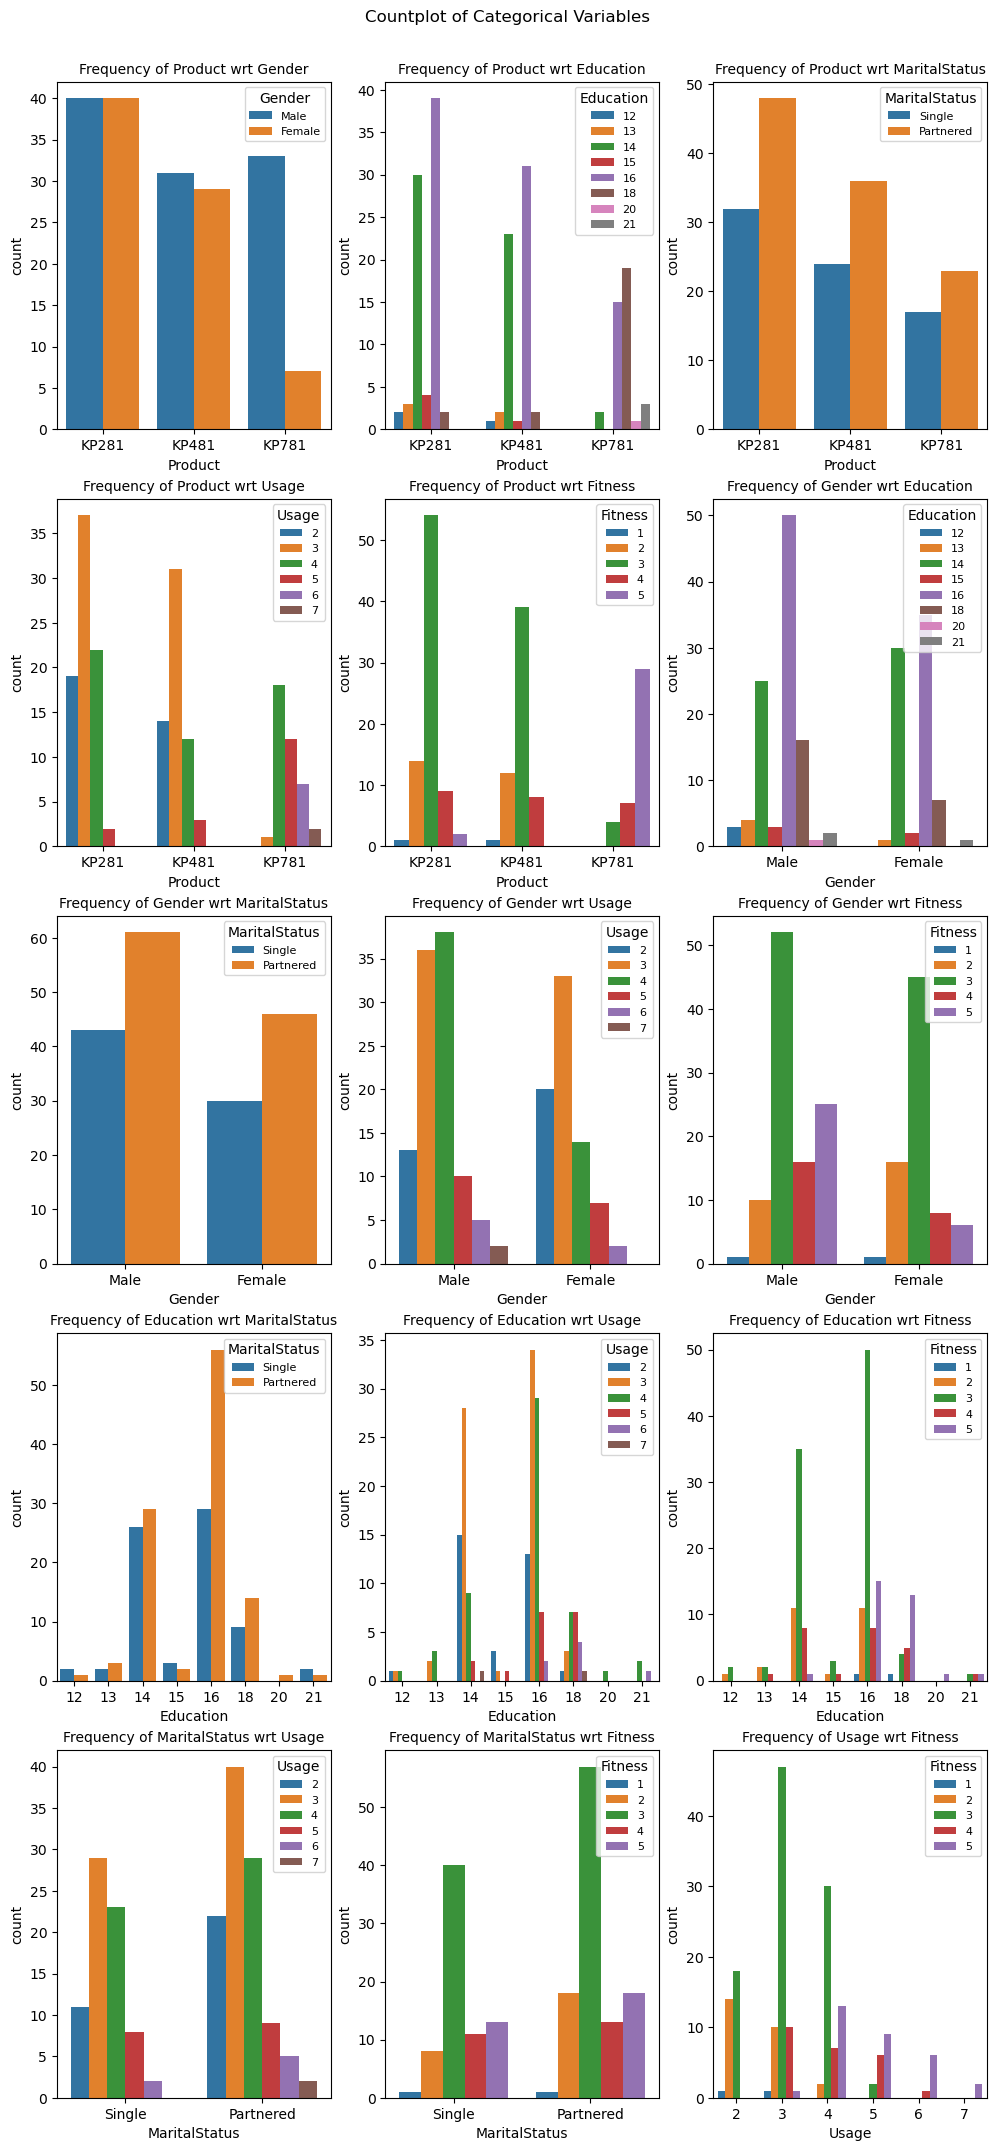

In [28]:
## Plotting Countplot of the Categorical variables of the dataset to see the distribution
fig = plt.figure(figsize = (12,24))
plt.suptitle("Countplot of Categorical Variables");
fig.tight_layout()
fig.subplots_adjust(top=0.95)
i = 1
h = 1
for c1 in cat_col:
    for c2 in cat_col[h:]:
        plt.subplot(5,3,i) 
        sns.countplot(data = df2, x = c1, hue = c2);
        plt.title("Frequency of "+ c1+ " wrt "+ c2, fontsize  = 10)
        plt.xticks(fontsize = 10);
        plt.legend(title = c2, loc= ("upper right"), fontsize = 8);
        i += 1
    h+=1

<font color = "red">**Observations 5 - Bivariate Analysis on Catagorical Variables**

<font color = "green" type = "Times New Roman" size = 2.5>

* **Product and Gender** <br>
    * KP281 and KP481 are almost equally popular among males and females. <br>
    * KP781, the expensive treadmill, is more prevalent among males. 

* **Product and Education** <br>
    * Most buyers with 14 years of Education are buying KP281 and KP481. <br>
    * Buyers with 16 years of Education are distributed in all three product segments. <br>
    * Buyers with 18 years of Education are considering KP781.

* **Product and MaritalStatus**
    * Among the buyers, Married people have a significantly greater share in all three product segments. <br>

* **Product and Usage** <br>
    * Buyers of KP781 planned to use the treadmill more often.

* **Product and Fitness**<br>
    * Buyers of KP781 are considered themselves fitter than the other two product categories.
    
* **Gender and Usage** <br>
    * Males have planned to use the treadmill more often than females.
    
* **Gender and Fitness** <br>
    * Reported Fitness levels of Male buyers are distributed relatively higher side (Left-skewed) than female buyers (Right-Skewed).

* **Usage and Fitness** <br>
    * Fitter people planned to use the machine more often.

In [29]:
t_col

Index(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'], dtype='object')

In [30]:
tc_col = ["Product", "Gender", "MaritalStatus"]
tc_col

['Product', 'Gender', 'MaritalStatus']

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


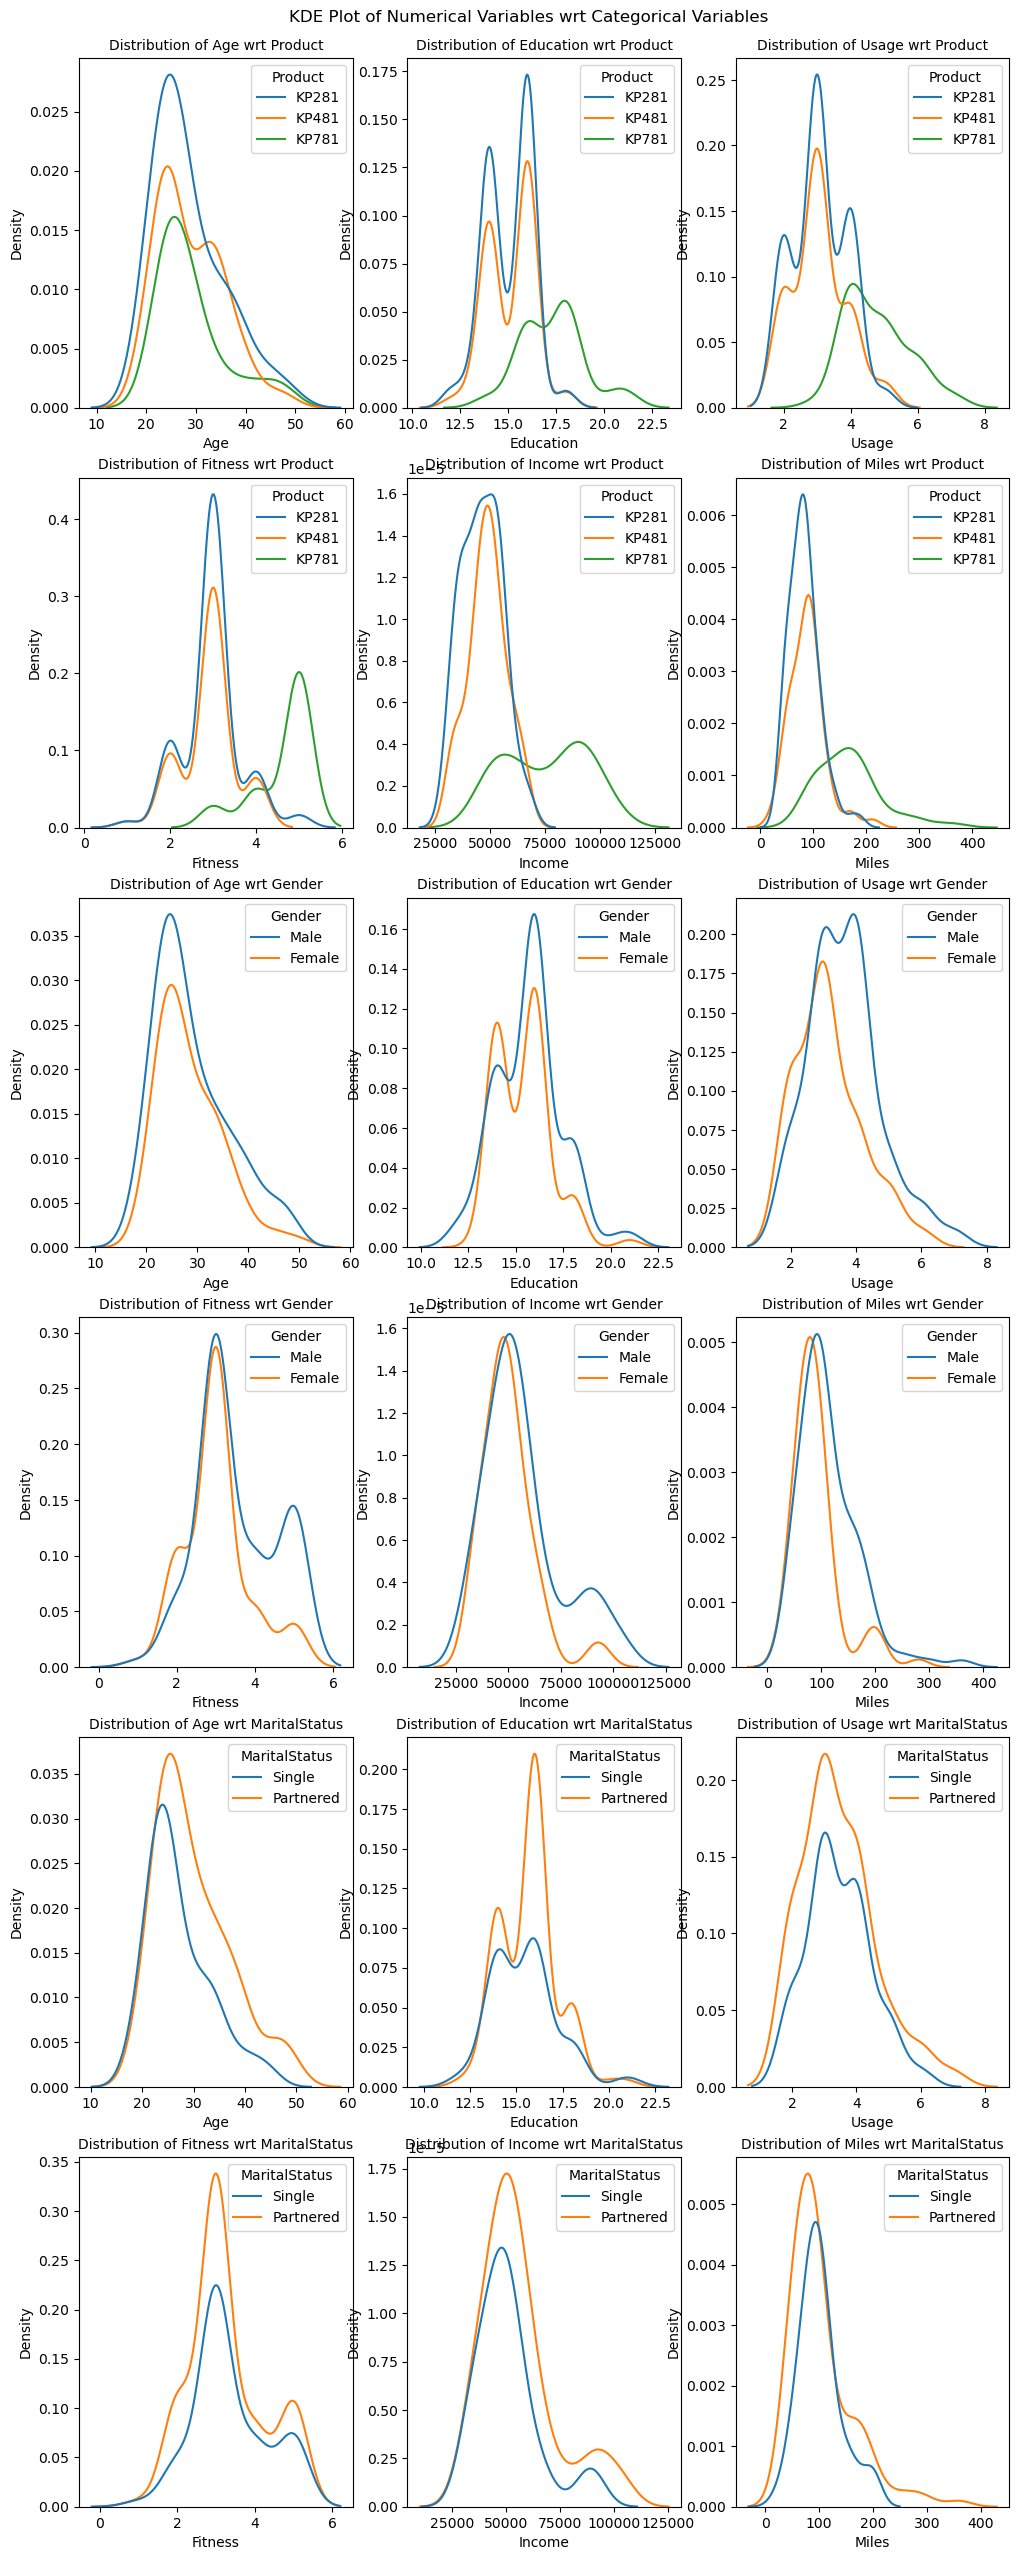

In [32]:
fig = plt.figure(figsize = (12,48))
plt.suptitle("KDE Plot of Numerical Variables wrt Categorical Variables");
fig.tight_layout()
fig.subplots_adjust(top=0.97)
i = 1
for c1 in tc_col:
    for n1 in t_col:
        plt.subplot(10,3,i) 
        sns.kdeplot(data = df1, x = n1, hue = c1, );
        plt.title("Distribution of "+n1+" wrt "+c1, fontsize  = 10)
        i += 1

<font color = "red">**Observations 6 - Bivariate Analysis on Contineous Variables**

<font color = "green" type = "Times New Roman" size = 2.8>

* All the KDE Plots with Product show that the distribution of buyers of KP281 and KP481 is almost similar across categories.
* KDE Plot of Age shows Mean Age of Buyers for all the Products categories is almost in the same range. 
* KDE Plot shows buyers of KP781 are in higher income brackets.
* KDE Plot shows buyers of KP781 are at higher fitness levels
* KDE Plot shows buyers of KP781 and at higher education levels.
* KDE Plot shows buyers of KP781 planned to walk/run more miles in a week. 
* KDE Plot shows buyers of KP781 planned to use treadmills more frequently than buyers of the other two treadmills.
</font>

### Multivariate Analysis <a id = "3.1">

In [33]:
cat_col

Index(['Product', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness'], dtype='object')

In [34]:
num_col

Index(['Age', 'Income', 'Miles'], dtype='object')

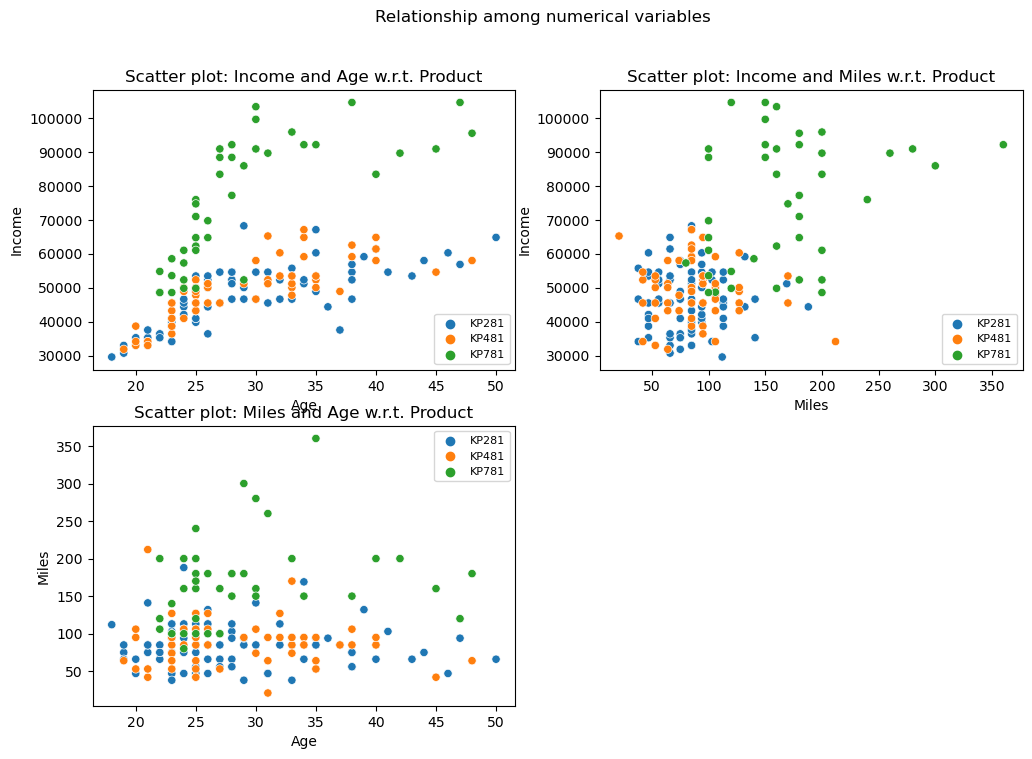

In [35]:
## Plots among numerical variables 
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.scatterplot(data = df1, x = "Age", y = "Income", hue = "Product");
plt.legend(loc = "lower right", fontsize = 8);
plt.title("Scatter plot: Income and Age w.r.t. Product")

plt.subplot(2,2,2)
sns.scatterplot(data = df1, x = "Miles", y = "Income", hue = "Product");
plt.legend(loc = "lower right", fontsize = 8);
plt.title("Scatter plot: Income and Miles w.r.t. Product")

plt.subplot(2,2,3)
sns.scatterplot(data = df1, x = "Age", y = "Miles", hue = "Product");
plt.legend(loc = "upper right", fontsize = 8);
plt.title("Scatter plot: Miles and Age w.r.t. Product")

plt.suptitle("Relationship among numerical variables");

In [36]:
df.loc[df["Product"] == "KP781"][["Age", "Income", "Miles"]].corr() #.style.background_gradient(cmap = "coolwarm")

,Age,Income,Miles
Age,1.000000,0.713489,0.243106
Income,0.713489,1.000000,0.309289
Miles,0.243106,0.309289,1.000000


<font color = "red">**Observations 7 - Multivariate Analysis on Contineous Variables**

<font color = "green" type = "Times New Roman" size = 2.8>

* The above plots suggest that KP281 and KP481 buyers are distributed evenly. There is no significant difference/relationship in the Age, Income or Miles feature distribution for these products.  
* The scatter plot between Age and Income shows that Income and Age are positively correlated for buyers of KP781. This means higher income level buyers' age is on a higher side.
* There is no noticeable relationship among the numerical variables
</font>

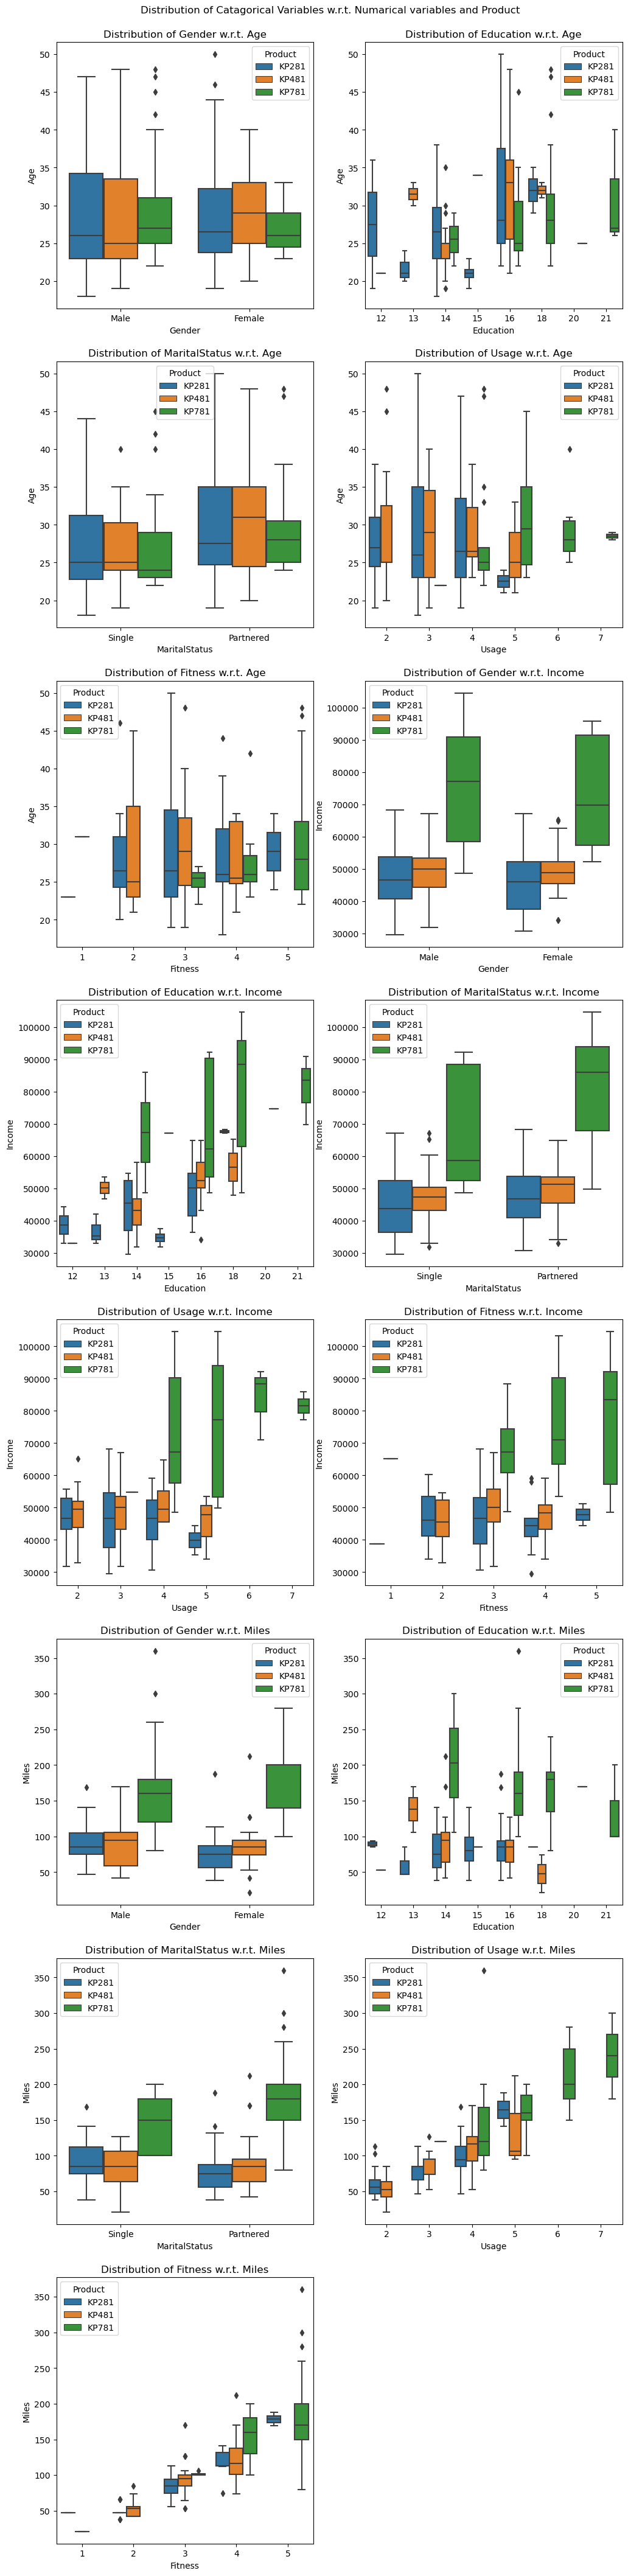

In [37]:
## plots between numerical and categorical variables
fig = plt.figure(figsize = (12,60))
i = 1
plt.suptitle("Distribution of Catagorical Variables w.r.t. Numarical variables and Product");
fig.tight_layout()
fig.subplots_adjust(top=0.97)
for num in num_col:
    for cat in cat_col[1:]:
        x = cat
        y = num
        plt.subplot(10,2,i);
        ax = sns.boxplot(data = df, x = x, y = y, hue = "Product");
        plt.title("Distribution of "+ cat +" w.r.t. "+ num)
        i += 1

In [38]:
df1[t_col].corr().round(2)  #.style.background_gradient(cmap = "coolwarm")

,Age,Education,Usage,Fitness,Income,Miles
Age,1.00,0.28,0.02,0.06,0.51,0.04
Education,0.28,1.00,0.40,0.41,0.63,0.31
Usage,0.02,0.40,1.00,0.67,0.52,0.76
Fitness,0.06,0.41,0.67,1.00,0.54,0.79
Income,0.51,0.63,0.52,0.54,1.00,0.54
Miles,0.04,0.31,0.76,0.79,0.54,1.00


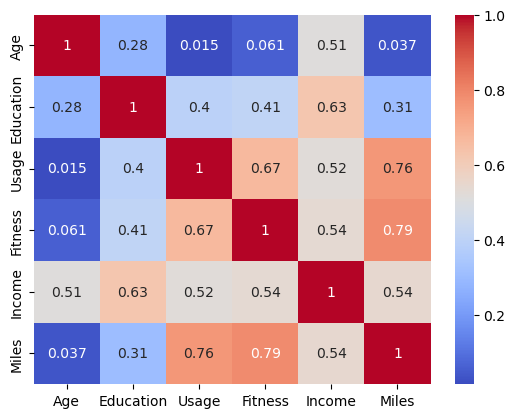

In [39]:
## Heatmap: Correaltion among numerical Variables
sns.heatmap(df1[t_col].corr(), annot=True, cmap = "coolwarm");

<Figure size 1200x1200 with 0 Axes>

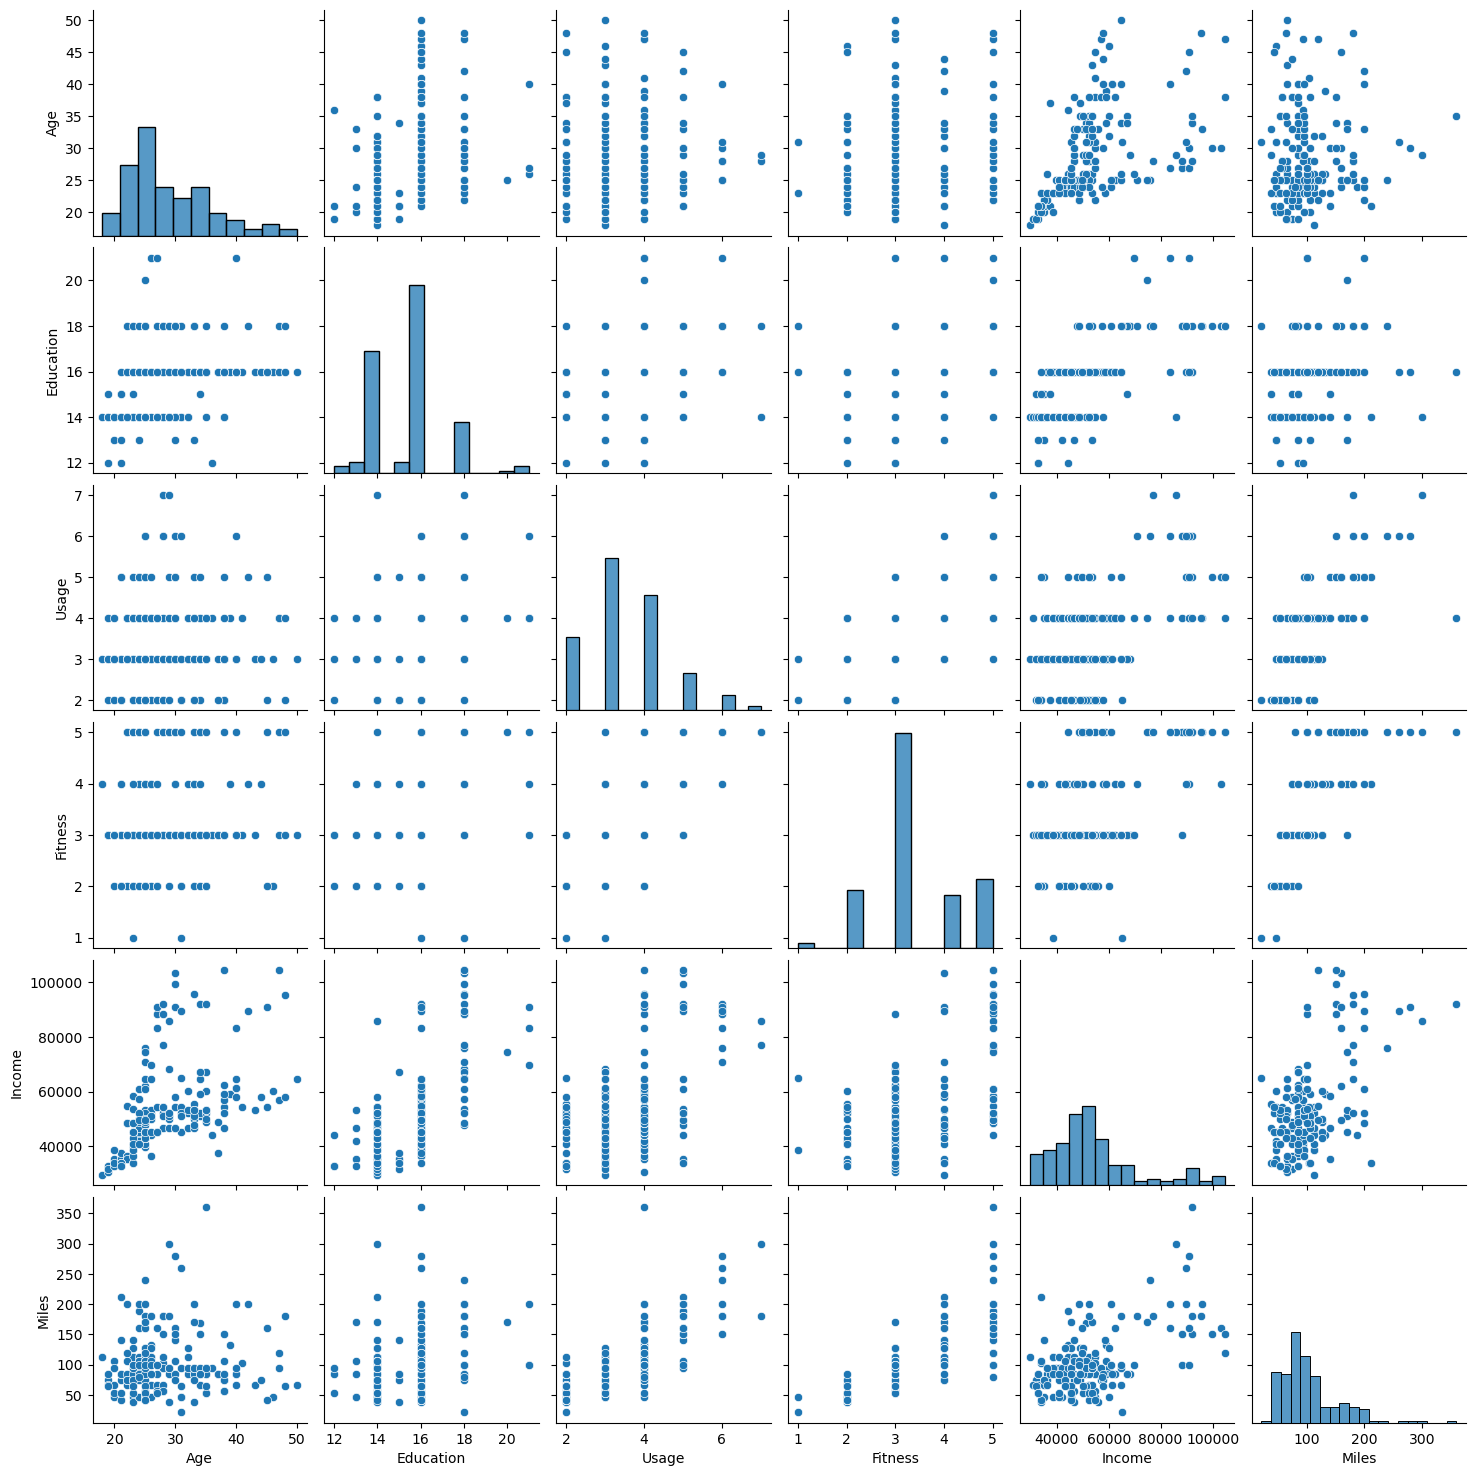

In [40]:
plt.figure(figsize = (12,12));
sns.pairplot(data = df1);

<font color = "red">**Observations 8 - Multivariate Analysis on Contineous Variables  wrt to Categorical Variables**

<font color = "green" type = "Times New Roman" size = 2.8>

* Mean Age of the Females who bought KP481 is higher than others
* Mean Age of the Partnered who bought KP481 is higher than others
* Mean Income is higher of KP781 buyers for both Males and Females
* Education higher than 16 years have considered either KP481 or KP781
* Mean income of Partnered is higher than single people
* Buyers of KP781 planned to use the product more often
* Buyers of KP781 are at higher fitness levels
* Miles planned are highest for KP781 than KP481 and KP281
* Females planned fewer miles walked than males for KP481 and KP281 but more for KP781
* Partnered planned more Miles walked than single for KP781
* Higher fitness levels attract more Miles to walk

## Missing Values and Outliers <a id = "4">

In [41]:
## Missing Values
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
Revenue          0
dtype: int64

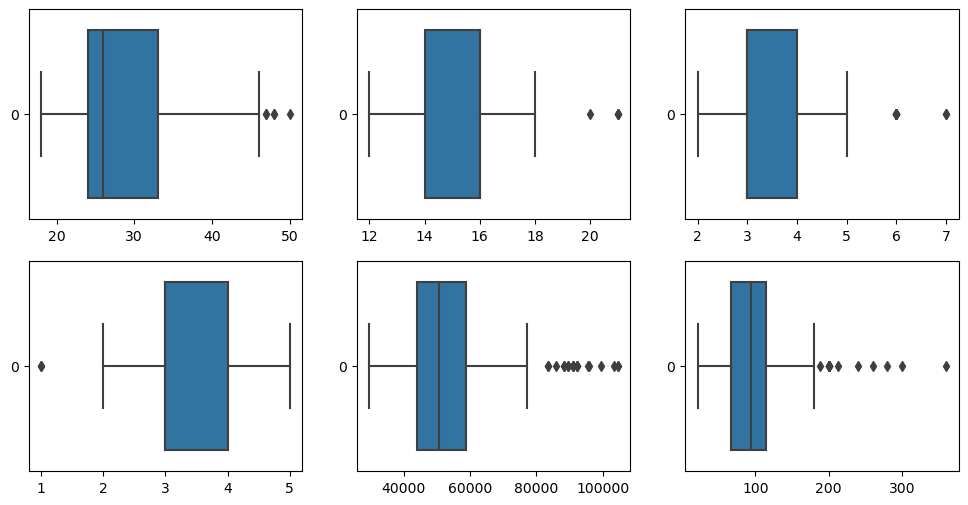

In [42]:
## Outliers
plt.figure(figsize = (12,6))
i = 1
for c in t_col:
    plt.subplot(2,3,i)
    sns.boxplot(data = df1[c],  orient = "h")
    i+=1

* We have the significant outliers on Income and Miles columns but deleting these values will not be a good idea
* For out analysis we will try to create a separate category for these outliers

## Marginal, Joint, and Conditional Probabilities <a id = "5">

In [43]:
## Creating Categories for numerical Variables
df4 = aerofit.copy()
df4['AgeCategory'] = df4["Age"].apply(lambda x: "Above 35" if x > 35 else "28-35" if x > 28 
                                      else "21-28" if x >21 else "Below 21")

df4['IncomeCategory'] = df4["Income"].apply(lambda x: "Very High" if x > 75000 else "High" if x > 60000 
                                              else "Medium" if x >45000 else "Low")

df4['MilesCategory'] = df4["Miles"].apply(lambda x: "Very High" if x > 150 else "High" if x > 120 
                                              else "Medium" if x > 90 else "Low")

In [44]:
df4.drop(columns=["Age", "Income", "Miles"], inplace = True)

In [45]:
df4.head()

,Product,Gender,Education,MaritalStatus,Usage,Fitness,AgeCategory,IncomeCategory,MilesCategory
0,KP281,Male,14,Single,3,4,Below 21,Low,Medium
1,KP281,Male,15,Single,2,3,Below 21,Low,Low
2,KP281,Female,14,Partnered,4,3,Below 21,Low,Low
3,KP281,Male,12,Single,3,3,Below 21,Low,Low
4,KP281,Male,13,Partnered,4,2,Below 21,Low,Low


In [46]:
for col in df4.columns[1:]:
    print("Feature: ", col, "and/given Product", end= "\n\n" )
    
    print("Absolute Values: ")
    print(pd.crosstab(index=df4[col],columns=df4['Product'],
                      margins=True), end = "\n\n")
    
    print("Marginal Probabilities:", col)
    print(pd.crosstab(index=df4[col],columns=df4['Product'],margins=True, 
                      normalize=True).round(2).iloc[:-1,-1], end = "\n\n")
    
    print("Joint Probabilities: Product and", col)
    print(pd.crosstab(index=df4[col],columns=df4['Product'], 
                      normalize=True).round(2), end = "\n\n")
    
    print("Conditional Probabilities: Product given", col)
    print(pd.crosstab(index=df4[col],columns=df4['Product'], 
                      normalize='index').round(2))
    print("--"*50)

Feature:  Gender and/given Product

Absolute Values: 
Product  KP281  KP481  KP781  All
Gender                           
Female      40     29      7   76
Male        40     31     33  104
All         80     60     40  180

Marginal Probabilities: Gender
Gender
Female    0.42
Male      0.58
Name: All, dtype: float64

Joint Probabilities: Product and Gender
Product  KP281  KP481  KP781
Gender                      
Female    0.22   0.16   0.04
Male      0.22   0.17   0.18

Conditional Probabilities: Product given Gender
Product  KP281  KP481  KP781
Gender                      
Female    0.53   0.38   0.09
Male      0.38   0.30   0.32
----------------------------------------------------------------------------------------------------
Feature:  Education and/given Product

Absolute Values: 
Product    KP281  KP481  KP781  All
Education                          
12             2      1      0    3
13             3      2      0    5
14            30     23      2   55
15             4     

<font color = "red">**Observations 9 - Probability Analysis**

<font color = "green" type = "Times New Roman" size = 2.8>

* Given that Females, there is less probability of considering buying KP781.
* For Education > 16 years, high probability of consideration of KP781.
* For 15 years of Education, high probability of consideration of KP281
* For Education less than 16 years, buyers are less likely to consider KP781 over the other two products.
* For Usage >= 5, there is a high probability that the buyer will consider KP781
* For Usage less than 3, there is a very low probability that the buyer will consider KP781 over the other two products
* For Fitness >= 4, there is a high probability that the buyer will consider KP781
* For Fitness greater than 2, there is a very low probability that the buyer will consider KP781 over the other two products
* For Very high Income, there is a high probability that buyers likely to consider KP781
* For low Income, there is a high probability that buyers consider KP281 over the other two products
* For Very high Miles planned, there is a high probability that the buyer will consider KP781
* For low Miles planned, there is a high probability that the buyer will consider KP281 over the other two products

### Marginal Probabiliities of the Products

In [47]:
df4.head(2)

,Product,Gender,Education,MaritalStatus,Usage,Fitness,AgeCategory,IncomeCategory,MilesCategory
0,KP281,Male,14,Single,3,4,Below 21,Low,Medium
1,KP281,Male,15,Single,2,3,Below 21,Low,Low


In [48]:
## Marginal Probabilities of Products
mpp = df4[["Product"]].value_counts(normalize=True).round(2).reset_index()
mpp.columns = ["Product", "Marginal Probability"]
mpp

,Product,Marginal Probability
0,KP281,0.44
1,KP481,0.33
2,KP781,0.22


**Marginal Probabilities of Products**

$$ P(\text{KP281}) = 0.44 $$

$$ P(\text{KP481}) = 0.33 $$

$$ P(\text{KP781}) = 0.22 $$

**Plotting the conditional Probabilities**

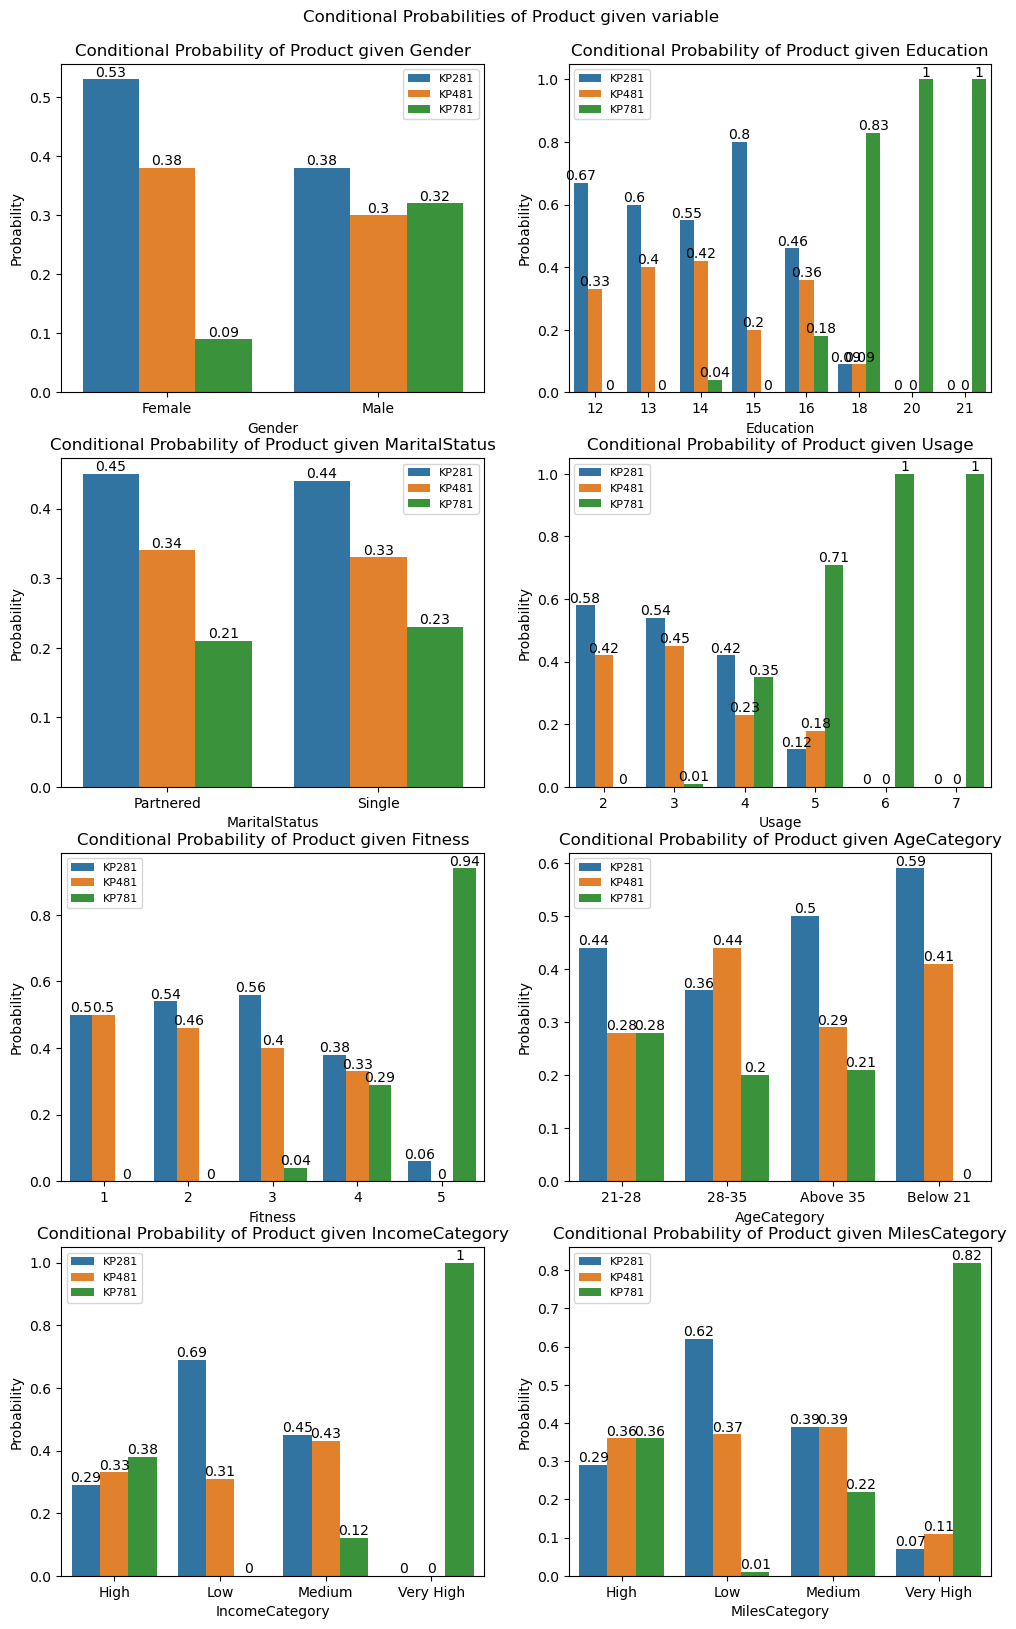

In [49]:
## Plotting the conditional Probabilities
fig = plt.figure(figsize = (12,18))
plt.suptitle("Conditional Probabilities of Product given variable");
fig.tight_layout()
fig.subplots_adjust(top=0.95)
i = 1

for c in df4.columns[1:]:
    plt.subplot(4,2,i)
    cp = pd.crosstab(df4[c], df4["Product"], normalize="index").reset_index().round(2)
    cp_melt = pd.melt(cp, id_vars= c, value_name="Probability")
    ax = sns.barplot(data = cp_melt, x = c, y = "Probability", hue = "Product")
    ax.bar_label(ax.containers[0]);
    ax.bar_label(ax.containers[1]);
    ax.bar_label(ax.containers[2]);
    plt.title("Conditional Probability of Product given "+ c)
    plt.legend(fontsize = 8)
    i += 1

## 6. Customer Profiling <a id = "6">

In [50]:
df4

,Product,Gender,Education,MaritalStatus,Usage,Fitness,AgeCategory,IncomeCategory,MilesCategory
0,KP281,Male,14,Single,3,4,Below 21,Low,Medium
1,KP281,Male,15,Single,2,3,Below 21,Low,Low
2,KP281,Female,14,Partnered,4,3,Below 21,Low,Low
3,KP281,Male,12,Single,3,3,Below 21,Low,Low
4,KP281,Male,13,Partnered,4,2,Below 21,Low,Low
...,...,...,...,...,...,...,...,...,...
175,KP781,Male,21,Single,6,5,Above 35,Very High,Very High
176,KP781,Male,18,Single,5,4,Above 35,Very High,Very High
177,KP781,Male,16,Single,5,5,Above 35,Very High,Very High
178,KP781,Male,18,Partnered,4,5,Above 35,Very High,Medium


### Profile - 1 - Higher Income + Better Fitness Levels

In [51]:
prof1 = df4.loc[(df4["IncomeCategory"].isin(["Very High", "High"])) & 
                (df4["Fitness"] > 3)]
prof1.shape

(26, 9)

In [52]:
pd.crosstab([prof1["Gender"], prof1["MaritalStatus"]], 
            prof1["Product"],
           margins= True,
           normalize=True).round(2)
# .style.background_gradient()

Product               KP781   All
Gender MaritalStatus             
Female Partnered       0.15  0.15
Male   Partnered       0.62  0.62
       Single          0.23  0.23
All                    1.00  1.00

### Profile - 2 - Low to Average Income + Low Fitness Levels

In [53]:
prof2 = df4.loc[(df4["IncomeCategory"].isin(["Medium", "Low"])) & 
                (df4["Fitness"] <= 3)]
prof2.shape

(109, 9)

In [54]:
pd.crosstab([prof2["Gender"], prof2["IncomeCategory"]], 
            prof2["Product"],
           margins= True,
           normalize=True).round(2)
# .style.background_gradient()

Product                KP281  KP481  KP781   All
Gender IncomeCategory                           
Female Low              0.14   0.05   0.00  0.18
       Medium           0.16   0.15   0.00  0.30
Male   Low              0.12   0.06   0.00  0.18
       Medium           0.17   0.16   0.01  0.33
All                     0.58   0.41   0.01  1.00

### Profile - 3 - Low Education + Low Income + Low Usage

In [55]:
prof3 = df4.loc[(df4["IncomeCategory"] == "Low") & 
                (df4["Education"] <= 14) & 
                (df4["Usage"] <= 3)]
prof3.shape

(24, 9)

In [56]:
pd.crosstab([prof3["Gender"], prof3["MaritalStatus"]], 
            prof3["Product"],
           margins= True,
           normalize=True).round(2)
# .style.background_gradient()

Product               KP281  KP481   All
Gender MaritalStatus                    
Female Partnered       0.21   0.04  0.25
       Single          0.08   0.17  0.25
Male   Partnered       0.04   0.17  0.21
       Single          0.17   0.12  0.29
All                    0.50   0.50  1.00

### Profile - 4 - Higher Education + Higher Usage + Higher Miles

In [57]:
prof4 = df4.loc[(df4["Education"] >= 16) & 
                (df4["MilesCategory"].isin(["Very High", "High"])) & 
                (df4["Usage"] >= 3)]
prof4.shape

(34, 9)

In [58]:
pd.crosstab([prof4["Gender"]], 
            prof4["Product"],
           margins= True,
           normalize=True).round(2)
# .style.background_gradient()

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.03,0.03,0.15,0.21
Male,0.09,0.06,0.65,0.79
All,0.12,0.09,0.79,1.00


### Profile - 5 - Average Education + Average Usage + Average Miles + Average Fitness + Average Income

In [59]:
prof4 = df4.loc[ (df4["Education"].isin([14, 15, 16])) & 
                 (df4["MilesCategory"] == "Medium") & 
                 (df4["Usage"].isin([2,3,4])) &
                 (df4["Fitness"].isin([3,4])) &
                 (df4["IncomeCategory"] == "Medium")]
prof4.shape

(21, 9)

In [60]:
pd.crosstab([prof4["Gender"]], 
            prof4["Product"],
           margins= True,
           normalize=True).round(2)
# .style.background_gradient()

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.19,0.14,0.00,0.33
Male,0.24,0.38,0.05,0.67
All,0.43,0.52,0.05,1.00


## 7. Business Insights <a id = "7"></a>

<font size =  3 color = "blue">

**_Business Insights from Non-Graphical, Graphical, and Probability Analysis_** <br> </font>

<font type = "Times New Roman" color = "green">

* Majority of buyers are young adults. <br>
* KP281 is the highest-selling treadmill with an overall 44.44% share in numbers and 36.92% in revenue<br>
* KP481 contributes 33.33% in numbers and 32.31% in revenue. <br>
* KP781 contributes 30.77% in numbers and 30.77% in revenue.<br>
* The above data points show that the contribution of all three products is significant. Thus, products are well planned, designed, priced, positioned and marketed per customer needs.
* 58% of the buyers are males.
* People with good Education are considering buying health-related products
* Married people are more interested in buying treadmills than single people
* Buyer often plans to use the treadmill 3-4 times a week
* People who consider themselves at fitness levels 3-4, i.e. somewhere in between, are the potential buyers, which also suggests an opportunity to attract/influence people with fitness levels 1-2, who must act on their Fitness.
* KP281 and KP481 are almost equally popular among males and females
* KP781, the expensive treadmill, is more prevalent among males
* Most buyers with 14 years of Education are buying KP281 and KP481.
* Buyers with 16 years of Education are distributed in all three product segments.
* Buyers with 18 years of Education are considering KP781.
* Among the buyers, Married people have a significantly greater share in all three product segments.
* Buyers of KP781 planned to use the treadmill more often.
* Buyers of KP781 are considered fitter than the other two product categories.
* Males have planned to use the treadmill more often than females.
* Fitter people planned to use the machine more often.
* Buyers of KP781 are in higher income brackets.
* Buyers of KP781 are at higher fitness levels
* Buyers of KP781 and at higher education levels.
* Buyers of KP781 planned to walk/run more miles in a week. 
* Buyers of KP781 planned to use treadmills more frequently than buyers of the other two treadmills.
* Mean Age of the Females who bought KP481 is higher than others
* Mean Age of the Partnered who bought KP481 is higher than others
* Mean Income is higher of KP781 buyers for both Males and Females
* Education higher than 16 years have considered either KP481 or KP781
* Mean income of Partnered is higher than single people
* Buyers of KP781 planned to use the product more often
* Buyers of KP781 are at higher fitness levels
* Miles planned are highest for KP781 than KP481 and KP281
* Females planned fewer miles walked than males for KP481 and KP281 but more for KP781
* Partnered planned more Miles walked than single for KP781
* Higher fitness levels attract more Miles to walk
* Given that Females, there is less probability of considering buying KP781.
* For Education > 16 years, high probability of consideration of KP781.
* For 15 years of Education, high probability of consideration of KP281
* For Education less than 16 years, buyers are less likely to consider KP781 over the other two products.
* For Usage >= 5, there is a high probability that the buyer will consider KP781
* For Usage less than 3, there is a very low probability that the buyer will consider KP781 over the other two products
* For Fitness >= 4, there is a high probability that the buyer will consider KP781
* For Fitness greater than 2, there is a very low probability that the buyer will consider KP781 over the other two products
* For Very high Income, there is a high probability that buyers likely to consider KP781
* For low Income, there is a high probability that buyers consider KP281 over the other two products
* For Very high Miles planned, there is a high probability that the buyer will consider KP781
* For low Miles planned, there is a high probability that the buyer will consider KP281 over the other two products
</font>
<font size =  3 color = "blue">

**_Most relevent factors on Customer Profiles_** </font>

* **KP781**

    1. KP781 buyers are from 
        - Higher fitness levels
        - Higher Income levels
        - Higher Education Level
        - Planned more Aveage usage
        - Planned more Average miles.
    2. Age brackets and Marital Status has negligible impact on buying decisions.<br><br>

* **KP481** and **KP281**

    1. The factors buyer consider for KP481 and KP281 are overlapping. No clear distinguishing factor found  
    2. KP281 and KP481 buyers belong to 
        - Low to Average income levels 
        - Low to Average planned usage 
        - Low to Average miles, 
        - Low to Average fitness level 
        - Low to Average Educationm.
    3. Age brackets and Marital Status has negligible impact on buying decisions

## 8. Recommendations <a id = "8"></a>

<font type = "Times New Roman" color = "green">

**Assumptions**:

1.   Profit margins for KP781 > KP481 > KP281
2.   Company has a strategy to tackle all the other challenges related to operations, marketing, sales, supply chain, finances etc.
3.   Company can use the information from the analysis to do customer segmentation, targeting,  and positioning.  </font>

<font type = "Times New Roman" color = "green">

**Key Recommendations**

1.   The sale quantity of the premium product **KP781** is significantly lower than other products; still, this product contributes almost the same as others in revenue. It shows that KP781 has the potential to lift the revenue significantly. The above analysis specifies the customer profile of the product **KP781**. The company should focus on targeting the potential prospects (Males + Higher Income Levels + Higher Education, Fitness, Usage, and Miles variables) to increase the sales of the KP781 product. A well thought marketing strategy for product KP781 is required so that the company can access the right market. 
2.   Customer profiles of the product KP281 & KP481 are overlapping. Thus, the company should push KP481 sales by adding additional differentiating factors. This will increase the revenue for the company.

<font size= 6 color = "red">
<b>---------------------------------- END -------------------------------------------

## Probabilities

* [1. Product and/given Gender](#p1)
* [2. Product and/given MaritalStatus](#p2)
* [3. Product and/given Income Brackets](#p3)
* [4. Product and/given Usage](#p4)
* [5. Product and/given Fitness](#p5)
* [6. Product and/given Miles](#p6)
* [7. Product and/given Education](#p7)

4. Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here) 5. Check correlation among different factors using heat maps or pair plots.
6. With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?
7. Customer Profiling - Categorization of users.
8. Probability- marginal, conditional probability.

### <font color = "blue"> 1. Product And/Given Gender <a id= "p1">

**Marginal Probabilities**

In [61]:
## Cross Tabulation
mgp = pd.crosstab(index = df["Gender"], 
                  columns = df["Product"], 
                  margins = True, 
                  margins_name = "Marginal Prob", 
                  normalize=True)
mgp.round(2)

Product,KP281,KP481,KP781,Marginal Prob
Gender,,,,
Female,0.22,0.16,0.04,0.42
Male,0.22,0.17,0.18,0.58
Marginal Prob,0.44,0.33,0.22,1.00


In [62]:
## Marginal Probabilities of Gender
mp_gender = mgp.iloc[:-1,-1:]
mp_gender.round(2)

Product,Marginal Prob
Gender,
Female,0.42
Male,0.58


#### Marginal Probabilities of Gender

$$ P(\text{Female}) = 0.42 $$

$$ P(\text{Male}) = 0.58 $$

**Joint Probabilities**

In [63]:
## Cross Tabulation 
pd.crosstab(index = df["Gender"], 
            columns = df["Product"], 
            margins = True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [64]:
## joint probability - Gender and Product
jgp = pd.crosstab(index = df["Gender"],
                  columns = df["Product"] , 
                  normalize=True)
jgp.round(2)

Product,KP281,KP481,KP781
Gender,,,
Female,0.22,0.16,0.04
Male,0.22,0.17,0.18


#### Joint Probabilities of Gender  and Product type

$$ P(\text{Female} ∩ \text{KP281}) = 0.22 $$

$$ P(\text{Female} ∩ \text{KP481}) = 0.16 $$

$$ P(\text{Female} ∩ \text{KP781}) = 0.04 $$

$$ P(\text{Male} ∩ \text{KP281}) = 0.22 $$

$$ P(\text{Male} ∩ \text{KP481}) = 0.17 $$

$$ P(\text{Male} ∩ \text{KP781}) = 0.18 $$

**Conditional Probabilities**

In [65]:
## Getting the Conditional Probabilities - Product given Gender
(jgp.T/mp_gender.iloc[:,0]).round(2)

Gender,Female,Male
Product,,
KP281,0.53,0.38
KP481,0.38,0.30
KP781,0.09,0.32


In [66]:
## Alternative Approach to get the same conditional probabilities
cgp = pd.crosstab(index = df["Gender"], 
                  columns = df["Product"],  
                  normalize="index")
cgp.round(2)

Product,KP281,KP481,KP781
Gender,,,
Female,0.53,0.38,0.09
Male,0.38,0.30,0.32


#### Conditional Probabilities of Products Given Gender

\begin{align}
P(\text{KP281 } | \text{ Female}) = \frac{P(\text{Female} ∩ \text{KP281})}{P(\text{Female})} &= \frac{0.22}{0.42} = 0.53 \\
P(\text{KP481 } | \text{ Female}) = \frac{P(\text{Female} ∩ \text{KP281})}{P(\text{Female})} &= \frac{0.16}{0.42} = 0.38 \\
P(\text{KP781 } | \text{ Female}) = \frac{P(\text{Female} ∩ \text{KP281})}{P(\text{Female})} &= \frac{0.04}{0.42} = 0.09 \\
P(\text{KP281 } | \text{ Male}) = \frac{P(\text{Male} ∩ \text{KP281})}{P(\text{Female})} &= \frac{0.22}{0.58} = 0.38 \\
P(\text{KP481 } | \text{ Male}) = \frac{P(\text{Male} ∩ \text{KP281})}{P(\text{Female})} &= \frac{0.17}{0.58} = 0.30 \\
P(\text{KP781 } | \text{ Male}) = \frac{P(\text{Male} ∩ \text{KP281})}{P(\text{Female})} &= \frac{0.18}{0.58} = 0.32\\
\end{align}


<Figure size 300x300 with 0 Axes>

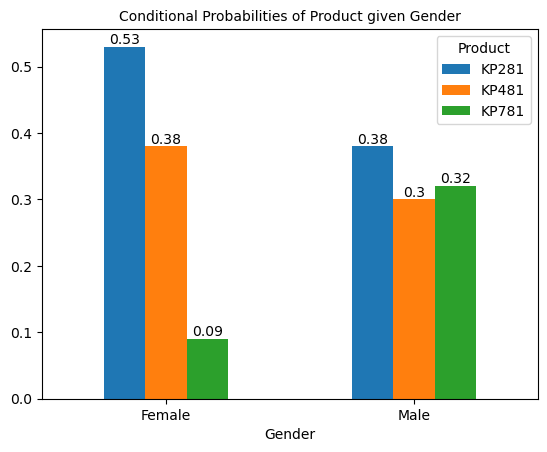

In [67]:
## Plotting the Conditional Probabilities
plt.figure(figsize = (3,3))
ax = cgp.round(2).plot(kind= "bar");
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
ax.bar_label(ax.containers[2]);
plt.title("Conditional Probabilities of Product given Gender", fontsize = 10);
plt.xticks(rotation = 0);

### <font color = "blue"> 2. Product And/Given MaritalStatus <a id= "p2">

**Marginal Probabilities**

In [68]:
## Cross Tabulation 
mmp = pd.crosstab(index = df["MaritalStatus"], 
                  columns = df["Product"] , 
                  margins = True, 
                  margins_name= "Marginal Prob",
                  normalize=True)
mmp.round(2)

Product,KP281,KP481,KP781,Marginal Prob
MaritalStatus,,,,
Partnered,0.27,0.20,0.13,0.59
Single,0.18,0.13,0.09,0.41
Marginal Prob,0.44,0.33,0.22,1.00


In [69]:
## Marginal Probabilities
mp_ms = mmp.iloc[:-1,-1:]
mp_ms.round(2)

Product,Marginal Prob
MaritalStatus,
Partnered,0.59
Single,0.41


#### Marginal Probabilities of MaritalStatus
$$ P(\text{Partnered}) = 0.59 $$

$$ P(\text{Single}) = 0.41 $$

**Joint Probabilities**

In [70]:
## Cross Tabulation 
pd.crosstab(index = df["MaritalStatus"], 
            columns = df["Product"], 
            margins = True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180


In [71]:
## joint probability - MaritalStatus and Product
jmp = pd.crosstab(index = df["MaritalStatus"],
                  columns = df["Product"] , 
                  normalize=True)
jmp.round(2)

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.27,0.20,0.13
Single,0.18,0.13,0.09


#### Joint Probabilities of MaritalStatus  and Product type

$$ P(\text{Partnered} ∩ \text{KP281}) = 0.27 $$

$$ P(\text{Partnered} ∩ \text{KP481}) = 0.20 $$

$$ P(\text{Partnered} ∩ \text{KP781}) = 0.13 $$

$$ P(\text{Single} ∩ \text{KP281}) = 0.18 $$

$$ P(\text{Single} ∩ \text{KP481}) = 0.13 $$

$$ P(\text{Single} ∩ \text{KP781}) = 0.09 $$

**Conditional Probabilities**

In [72]:
## Getting the Conditional Probabilities - Product given MaritalStatus
cmp = pd.crosstab(index = df["MaritalStatus"], 
                  columns = df["Product"],  
                  normalize="index").round(2)
cmp

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.45,0.34,0.21
Single,0.44,0.33,0.23


#### Conditional Probabilities of Products Given MaritalStatus

\begin{align}
P(\text{KP281 } | \text{ Partnered}) = \frac{P(\text{Partnered} ∩ \text{KP281})}{P(\text{Partnered})} &= \frac{0.27}{0.59} = 0.45 \\
P(\text{KP481 } | \text{ Partnered}) = \frac{P(\text{Partnered} ∩ \text{KP281})}{P(\text{Partnered})} &= \frac{0.20}{0.59} = 0.34 \\
P(\text{KP781 } | \text{ Partnered}) = \frac{P(\text{Partnered} ∩ \text{KP281})}{P(\text{Partnered})} &= \frac{0.13}{0.59} = 0.21 \\
P(\text{KP281 } | \text{ Single}) = \frac{P(\text{Single} ∩ \text{KP281})}{P(\text{Single})} &= \frac{0.18}{0.41} = 0.44 \\
P(\text{KP481 } | \text{ Single}) = \frac{P(\text{Single} ∩ \text{KP281})}{P(\text{Single})} &= \frac{0.13}{0.41} = 0.33 \\
P(\text{KP781 } | \text{ Single}) = \frac{P(\text{Single} ∩ \text{KP281})}{P(\text{Single})} &= \frac{0.09}{0.41} = 0.23\\
\end{align}


<Figure size 300x300 with 0 Axes>

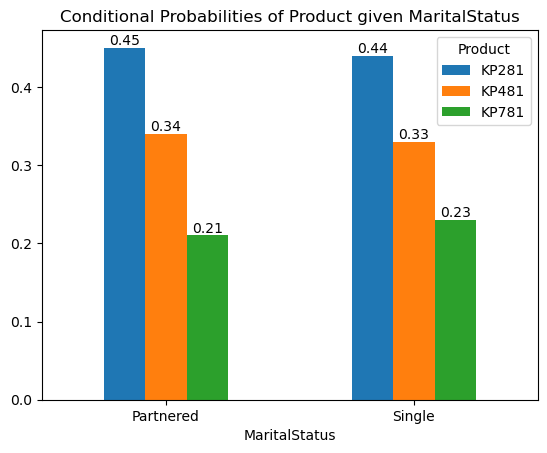

In [73]:
## Plotting the Conditional Probabilities
plt.figure(figsize = (3,3));
ax = cmp.plot(kind= "bar");
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
ax.bar_label(ax.containers[2]);
plt.title("Conditional Probabilities of Product given MaritalStatus", fontsize = 12);
plt.xticks(rotation = 0);

### <font color = "blue"> 3. Product And/Given Income <a id= "p3">

**Marginal Probabilities**

In [74]:
df["Income"].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

**Income Brackets**
Assuming income brackets
* Above 75 percentile (Q3) = "High" 
* within IQR = "Median"
* Below 25 percentile (Q1) = "Low"

In [75]:
## Creating income brackets
df["Income_Bracket"] = df["Income"].apply(lambda x: "High" if x >= 58668 else "Medium" if x >= 44058 else "Low" )

In [76]:
df.groupby(["Income_Bracket"])[["Product"]].count()

,Product
Income_Bracket,
High,45
Low,45
Medium,90


**Marginal Probabilities**

In [77]:
## Cross Tabulation
ip = pd.crosstab(index = df["Income_Bracket"], 
                  columns = df["Product"], 
                  margins = True, 
                  margins_name = "Marginal Prob", 
                  normalize=True)
ip.round(2)

Product,KP281,KP481,KP781,Marginal Prob
Income_Bracket,,,,
High,0.04,0.05,0.16,0.25
Low,0.17,0.08,0.00,0.25
Medium,0.24,0.20,0.06,0.50
Marginal Prob,0.44,0.33,0.22,1.00


In [78]:
## Marginal Probabilities of Income Bracket
mp_ib = ip.iloc[:-1,-1:]
mp_ib.round(2)

Product,Marginal Prob
Income_Bracket,
High,0.25
Low,0.25
Medium,0.50


#### Marginal Probabilities of Gender

$$ P(\text{High}) = 0.25 $$

$$ P(\text{Medium}) = 0.50 $$

$$ P(\text{Low}) = 0.25 $$

**Joint Probabilities**

In [79]:
## Cross Tabulation
pd.crosstab(index = df["Income_Bracket"], 
            columns = df["Product"], 
            margins = True,
           margins_name = "Total")

Product,KP281,KP481,KP781,Total
Income_Bracket,,,,
High,7,9,29,45
Low,30,15,0,45
Medium,43,36,11,90
Total,80,60,40,180


In [80]:
## joint probability - Income Bracket and Product
jgp = pd.crosstab(index = df["Income_Bracket"],
                  columns = df["Product"], 
                  normalize=True)
jgp.round(2)

Product,KP281,KP481,KP781
Income_Bracket,,,
High,0.04,0.05,0.16
Low,0.17,0.08,0.00
Medium,0.24,0.20,0.06


#### Joint Probabilities of Gender  and Product type

$$ P(\text{High} ∩ \text{KP281}) = 0.04 $$

$$ P(\text{High} ∩ \text{KP481}) = 0.05 $$

$$ P(\text{High} ∩ \text{KP781}) = 0.16 $$

$$ P(\text{Medium} ∩ \text{KP281}) = 0.24 $$

$$ P(\text{Medium} ∩ \text{KP481}) = 0.20 $$

$$ P(\text{Medium} ∩ \text{KP781}) = 0.06 $$

$$ P(\text{Low} ∩ \text{KP281}) = 0.17 $$

$$ P(\text{Low} ∩ \text{KP481}) = 0.08 $$

$$ P(\text{Low} ∩ \text{KP781}) = 0.0 $$

**Conditional Probabilities**

In [81]:
## Conditional probability - Income Bracket and Product
cip = pd.crosstab(index = df["Income_Bracket"], 
                  columns = df["Product"],  
                  normalize="index")
cip.round(2)

Product,KP281,KP481,KP781
Income_Bracket,,,
High,0.16,0.20,0.64
Low,0.67,0.33,0.00
Medium,0.48,0.40,0.12


#### Conditional Probabilities of Products Given Income Bracket

\begin{align}
P(\text{KP281 } | \text{ High}) = \frac{P(\text{High} ∩ \text{KP281})}{P(\text{High})} &= \frac{0.04}{0.25} = 0.16 \\
P(\text{KP481 } | \text{ High}) = \frac{P(\text{High} ∩ \text{KP281})}{P(\text{High})} &= \frac{0.05}{0.25} = 0.20 \\
P(\text{KP781 } | \text{ High}) = \frac{P(\text{High} ∩ \text{KP281})}{P(\text{High})} &= \frac{0.16}{0.25} = 0.64 \\
P(\text{KP281 } | \text{ Medium}) = \frac{P(\text{Medium} ∩ \text{KP281})}{P(\text{Medium})} &= \frac{0.24}{0.50} = 0.48 \\
P(\text{KP481 } | \text{ Medium}) = \frac{P(\text{Medium} ∩ \text{KP281})}{P(\text{Medium})} &= \frac{0.20}{0.50} = 0.40 \\
P(\text{KP781 } | \text{ Medium}) = \frac{P(\text{Medium} ∩ \text{KP281})}{P(\text{Medium})} &= \frac{0.06}{0.50} = 0.12 \\
P(\text{KP281 } | \text{ Low}) = \frac{P(\text{Low} ∩ \text{KP281})}{P(\text{Low})} &= \frac{0.17}{0.25} = 0.67 \\
P(\text{KP481 } | \text{ Low}) = \frac{P(\text{Low} ∩ \text{KP281})}{P(\text{Low})} &= \frac{0.08}{0.25} = 0.33 \\
P(\text{KP781 } | \text{ Low}) = \frac{P(\text{Low} ∩ \text{KP281})}{P(\text{Low})} &= \frac{0.0}{0.25} = 0.0 \\
\end{align}


<Figure size 300x300 with 0 Axes>

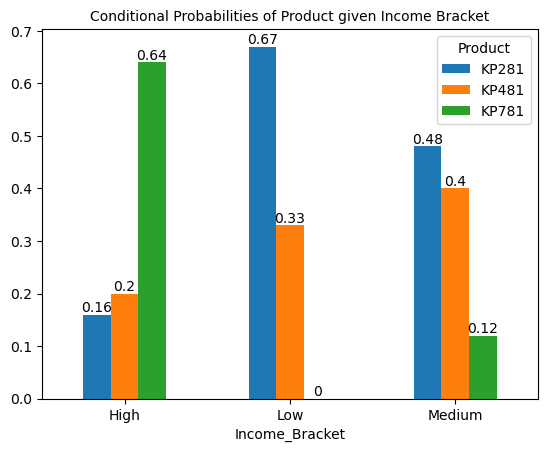

In [82]:
## Plotting the Conditional Probabilities
plt.figure(figsize = (3,3))
ax = cip.round(2).plot(kind= "bar");
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
ax.bar_label(ax.containers[2]);
plt.title("Conditional Probabilities of Product given Income Bracket", fontsize = 10);
plt.xticks(rotation = 0);

### 4. Product And/Given Usage <a id= "p4">

**Marginal Probabilities**

In [83]:
## Cross Tabulation
up = pd.crosstab(index = df["Usage"], 
                  columns = df["Product"], 
                  margins = True, 
                  margins_name = "Marginal Prob", 
                  normalize=True)
up.round(2)

Product,KP281,KP481,KP781,Marginal Prob
Usage,,,,
2,0.11,0.08,0.00,0.18
3,0.21,0.17,0.01,0.38
4,0.12,0.07,0.10,0.29
5,0.01,0.02,0.07,0.09
6,0.00,0.00,0.04,0.04
7,0.00,0.00,0.01,0.01
Marginal Prob,0.44,0.33,0.22,1.00


In [84]:
## Marginal Probabilities of Usage
mp_usage = up.iloc[:-1,-1:].round(2).reset_index()
mp_usage

Product,Usage,Marginal Prob
0,2,0.18
1,3,0.38
2,4,0.29
3,5,0.09
4,6,0.04
5,7,0.01


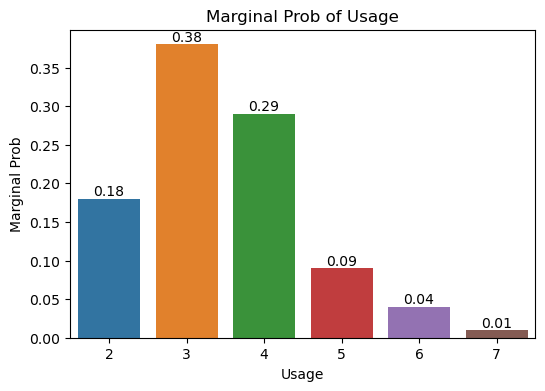

In [85]:
fig = plt.figure(figsize=(6,4))
ax = sns.barplot(data= mp_usage, x = "Usage", y = "Marginal Prob")
ax.bar_label(ax.containers[0]);
plt.title("Marginal Prob of Usage");

**Joint Probabilities**

In [86]:
## Cross Tabulation
pd.crosstab(index = df["Usage"], 
            columns = df["Product"], 
            margins = True,
           margins_name = "Total")

Product,KP281,KP481,KP781,Total
Usage,,,,
2,19,14,0,33
3,37,31,1,69
4,22,12,18,52
5,2,3,12,17
6,0,0,7,7
7,0,0,2,2
Total,80,60,40,180


In [87]:
## joint probability - Usage and Product
jup = pd.crosstab(index = df["Usage"],
                  columns = df["Product"], 
                  normalize=True).round(2)
jup

Product,KP281,KP481,KP781
Usage,,,
2,0.11,0.08,0.00
3,0.21,0.17,0.01
4,0.12,0.07,0.10
5,0.01,0.02,0.07
6,0.00,0.00,0.04
7,0.00,0.00,0.01


<Figure size 640x480 with 0 Axes>

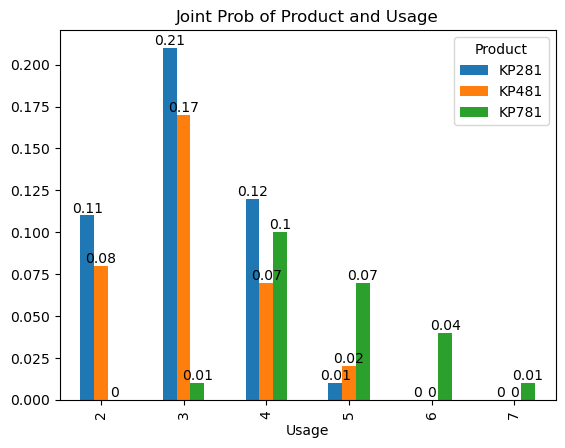

In [88]:
fig = plt.figure();
ax = jup.plot.bar();
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
ax.bar_label(ax.containers[2]);
plt.title("Joint Prob of Product and Usage");

**Conditional Probabilities**

In [89]:
## Alternative Approach to get the same conditional probabilities
cup = pd.crosstab(index = df["Usage"], 
                  columns = df["Product"],  
                  normalize="index").round(2)
cup

Product,KP281,KP481,KP781
Usage,,,
2,0.58,0.42,0.00
3,0.54,0.45,0.01
4,0.42,0.23,0.35
5,0.12,0.18,0.71
6,0.00,0.00,1.00
7,0.00,0.00,1.00


<Figure size 640x480 with 0 Axes>

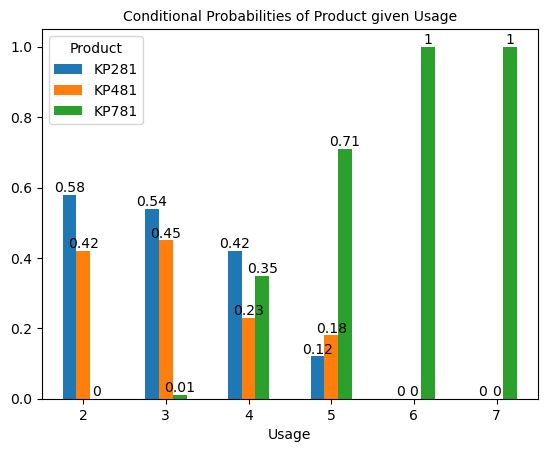

In [90]:
## Plotting the Conditional Probabilities
plt.figure()
ax = cup.round(2).plot(kind= "bar");
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
ax.bar_label(ax.containers[2]);
plt.title("Conditional Probabilities of Product given Usage", fontsize = 10);
plt.xticks(rotation = 0);

### 5. Product And/Given Fitness <a id= "p5">

**Marginal Probabilities**

In [91]:
## Cross Tabulation
fp = pd.crosstab(index = df["Fitness"], 
                  columns = df["Product"], 
                  margins = True, 
                  margins_name = "Marginal Prob", 
                  normalize=True)
fp.round(2)

Product,KP281,KP481,KP781,Marginal Prob
Fitness,,,,
1,0.01,0.01,0.00,0.01
2,0.08,0.07,0.00,0.14
3,0.30,0.22,0.02,0.54
4,0.05,0.04,0.04,0.13
5,0.01,0.00,0.16,0.17
Marginal Prob,0.44,0.33,0.22,1.00


In [92]:
## Marginal Probabilities of Fitness
mp_fitness = fp.iloc[:-1,-1:].round(2).reset_index()
mp_fitness

Product,Fitness,Marginal Prob
0,1,0.01
1,2,0.14
2,3,0.54
3,4,0.13
4,5,0.17


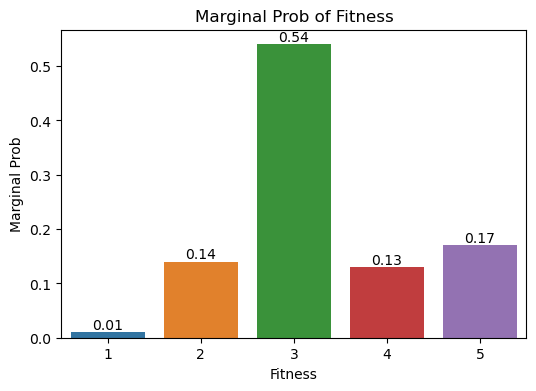

In [93]:
fig = plt.figure(figsize=(6,4))
ax = sns.barplot(data= mp_fitness, x = "Fitness", y = "Marginal Prob")
ax.bar_label(ax.containers[0]);
plt.title("Marginal Prob of Fitness");

**Joint Probabilities**

In [94]:
## Cross Tabulation
pd.crosstab(index = df["Fitness"], 
            columns = df["Product"], 
            margins = True,
           margins_name = "Total")

Product,KP281,KP481,KP781,Total
Fitness,,,,
1,1,1,0,2
2,14,12,0,26
3,54,39,4,97
4,9,8,7,24
5,2,0,29,31
Total,80,60,40,180


In [95]:
## joint probability - Fitness and Product
jfp = pd.crosstab(index = df["Fitness"],
                  columns = df["Product"], 
                  normalize=True).round(2)
jfp

Product,KP281,KP481,KP781
Fitness,,,
1,0.01,0.01,0.00
2,0.08,0.07,0.00
3,0.30,0.22,0.02
4,0.05,0.04,0.04
5,0.01,0.00,0.16


<Figure size 1200x400 with 0 Axes>

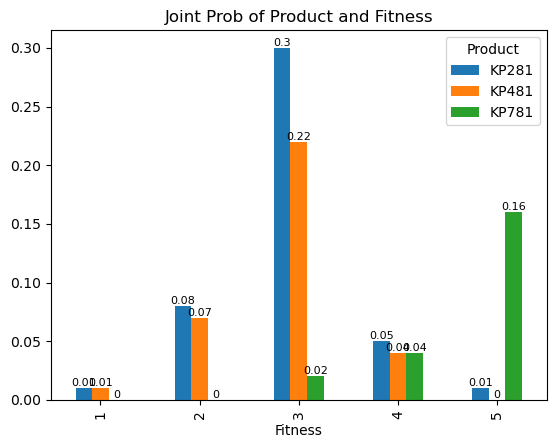

In [96]:
fig = plt.figure(figsize= (12,4));
ax = jfp.plot.bar();
ax.bar_label(ax.containers[0], fontsize = 8);
ax.bar_label(ax.containers[1], label_type="edge", fontsize = 8);
ax.bar_label(ax.containers[2], fontsize = 8);
plt.title("Joint Prob of Product and Fitness");

**Conditional Probabilities**

In [97]:
## Conditional probability - Product given Fitness
cfp = pd.crosstab(index = df["Fitness"], 
                  columns = df["Product"],  
                  normalize="index").round(2)
cfp

Product,KP281,KP481,KP781
Fitness,,,
1,0.50,0.50,0.00
2,0.54,0.46,0.00
3,0.56,0.40,0.04
4,0.38,0.33,0.29
5,0.06,0.00,0.94


<Figure size 640x480 with 0 Axes>

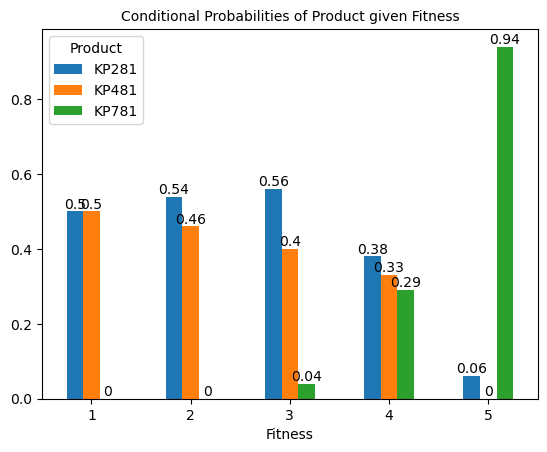

In [98]:
## Plotting the Conditional Probabilities
plt.figure()
ax = cfp.round(2).plot(kind= "bar");
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
ax.bar_label(ax.containers[2]);
plt.title("Conditional Probabilities of Product given Fitness", fontsize = 10);
plt.xticks(rotation = 0);

### 6. Product And/Given Miles <a id= "p6">

**Marginal Probabilities**

In [99]:
df1["Miles"].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

**Income Brackets**
Assuming income brackets
* Above 75 percentile (Q3) = "High" 
* within IQR = "Mediun"
* Below 25 percentile (Q1) = "Low"

In [100]:
## Creating income brackets
df["Miles_Bracket"] = df["Miles"].apply(lambda x: "High" if x >= 114.75 else "Medium" if x >= 66 else "Low" )

In [101]:
df.groupby(["Miles_Bracket"])[["Product"]].count()

,Product
Miles_Bracket,
High,45
Low,36
Medium,99


**Marginal Probabilities**

In [102]:
## Cross Tabulation
mb = pd.crosstab(index = df["Miles_Bracket"], 
                  columns = df["Product"], 
                  margins = True, 
                  margins_name = "Marginal Prob", 
                  normalize=True)
mb.round(2)

Product,KP281,KP481,KP781,Marginal Prob
Miles_Bracket,,,,
High,0.03,0.04,0.17,0.25
Low,0.10,0.10,0.00,0.20
Medium,0.31,0.19,0.05,0.55
Marginal Prob,0.44,0.33,0.22,1.00


In [103]:
## Marginal Probabilities of Miles_Bracket
mp_mb = ip.iloc[:-1,-1:]
mp_mb.round(2)

Product,Marginal Prob
Income_Bracket,
High,0.25
Low,0.25
Medium,0.50


#### Marginal Probabilities of Gender

$$ P(\text{High}) = 0.25 $$

$$ P(\text{Medium}) = 0.50 $$

$$ P(\text{Low}) = 0.25 $$

**Joint Probabilities**

In [104]:
## Cross Tabulation
pd.crosstab(index = df["Miles_Bracket"], 
            columns = df["Product"], 
            margins = True,
           margins_name = "Total")

Product,KP281,KP481,KP781,Total
Miles_Bracket,,,,
High,6,8,31,45
Low,18,18,0,36
Medium,56,34,9,99
Total,80,60,40,180


In [105]:
## joint probability - Miles_Bracket and Product
jgp = pd.crosstab(index = df["Miles_Bracket"],
                  columns = df["Product"], 
                  normalize=True)
jgp.round(2)

Product,KP281,KP481,KP781
Miles_Bracket,,,
High,0.03,0.04,0.17
Low,0.10,0.10,0.00
Medium,0.31,0.19,0.05


#### Joint Probabilities of Gender  and Product type

$$ P(\text{High} ∩ \text{KP281}) = 0.03 $$

$$ P(\text{High} ∩ \text{KP481}) = 0.04 $$

$$ P(\text{High} ∩ \text{KP781}) = 0.17 $$

$$ P(\text{Medium} ∩ \text{KP281}) = 0.31 $$

$$ P(\text{Medium} ∩ \text{KP481}) = 0.19 $$

$$ P(\text{Medium} ∩ \text{KP781}) = 0.05 $$

$$ P(\text{Low} ∩ \text{KP281}) = 0.10 $$

$$ P(\text{Low} ∩ \text{KP481}) = 0.10 $$

$$ P(\text{Low} ∩ \text{KP781}) = 0.0 $$

**Conditional Probabilities**

In [106]:
## Conditional probability - Income Bracket and Product
cmb = pd.crosstab(index = df["Miles_Bracket"], 
                  columns = df["Product"],  
                  normalize="index")
cmb.round(2)

Product,KP281,KP481,KP781
Miles_Bracket,,,
High,0.13,0.18,0.69
Low,0.50,0.50,0.00
Medium,0.57,0.34,0.09


<Figure size 300x300 with 0 Axes>

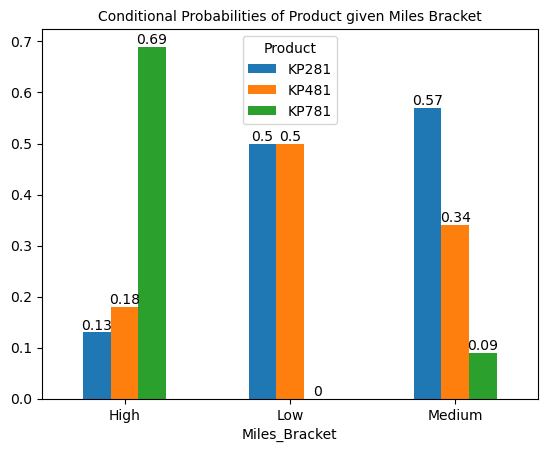

In [107]:
## Plotting the Conditional Probabilities
plt.figure(figsize = (3,3))
ax = cmb.round(2).plot(kind= "bar");
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
ax.bar_label(ax.containers[2]);
plt.title("Conditional Probabilities of Product given Miles Bracket", fontsize = 10);
plt.xticks(rotation = 0);